# **Problem Statement**

### Context

Context
A significant number of hotel bookings are called off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
1. Loss of resources (revenue) when the hotel cannot resell the room.
2. Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
3. Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
4. Human resources to make arrangements for thking was canceled or not.r or not.

### Objective

The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.king was canceled or not.r or not.

### Data Description

1. Booking_ID: the unique identifier of each booking
2. 
no_of_adults: Number of adult
3. 
no_of_children: Number of Childr
4. n
no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the ho
5. el
no_of_week_nights: Number of weeknights (Monday to Friday) the guest stayed or booked to stay at the h
6. tel
type_of_meal_plan: Type of meal plan booked by the customer:
Not Selected – No meal plan se,lected
Meal Plan 1 – Br,eakfast
Meal Plan 2 – Half board (breakfast and one oth,er meal)
Meal Plan 3 – Full board (breakfast, lunch, an
7.  dinner)
required_car_parking_space: Does the customer require a car parking space? (0 - N
8. , 1- Yes)
room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN H
9. tels Group
lead_time: Number of days between the date of booking and the 
10. rrival date
arrival_year: Year of
11. arrival date
arrival_month: Month o
12.  arrival date
arrival_date: Da
13. e of the month
market_segment_type: Market segm
14. nt designation.
repeated_guest: Is the customer a repeated guest?
15. (0 - No, 1- Yes)
no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to t
16. e current booking
no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to 
17. he current booking
avg_price_per_room: Average price per day of the reservation; prices of the rooms are
18. dynamic. (in euros)
no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, vie
19.  from the room, etc)
booking_status: Flag indicating if the booking was canceled or not.

# **Importing the necessary libraries**

In [105]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

# To build model for prediction
import statsmodels.api as SM
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
)

# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

# **Loading the dataset**

In [107]:
import os
path = os.getcwd() + '\\INNHotelsGroup.csv'
df = pd.read_csv(path)

In [108]:
# copying data to another variable to avoid any changes to original data
data = df.copy()

# **Data Overview**

### View the first and last 5 rows of the dataset

In [111]:
data.head() ##  view top 5 rows of the data

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled


In [112]:
data.tail() ##  view last 5 rows of the data

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80000,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95000,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39000,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50000,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67000,0,Not_Canceled


### Understand the shape of the dataset

In [114]:
data.shape ##  view dimensions of the data

(36275, 19)

### Check the data types of the columns for the dataset

In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

### Checking the duplicate & missing values

In [118]:
# checking for duplicate values
print('Duplicated Values: ',data.duplicated().sum())

Duplicated Values:  0


In [119]:
# checking for duplicate values
print('Missing Values:-\n')
data.isnull().sum()

Missing Values:-



Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

### Dropping the unique values column

In [121]:
# checking the number of unique values
data["Booking_ID"].nunique()

36275

**Let's drop the ID column first before we proceed forward**.

In [123]:
data = data.drop(['Booking_ID'], axis=1) ## drop the ID column from the data Because all value are unique

### Checking the statistical summary

In [125]:
data.describe(include='all').T ##  view the statistical summary of the data

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
no_of_adults,36275.00000,NaN,NaN,NaN,1.84496,0.51871,0.00000,2.00000,2.00000,2.00000,4.00000
no_of_children,36275.00000,NaN,NaN,NaN,0.10528,0.40265,0.00000,0.00000,0.00000,0.00000,10.00000
no_of_weekend_nights,36275.00000,NaN,NaN,NaN,0.81072,0.87064,0.00000,0.00000,1.00000,2.00000,7.00000
no_of_week_nights,36275.00000,NaN,NaN,NaN,2.20430,1.41090,0.00000,1.00000,2.00000,3.00000,17.00000
type_of_meal_plan,36275,4,Meal Plan 1,27835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
required_car_parking_space,36275.00000,NaN,NaN,NaN,0.03099,0.17328,0.00000,0.00000,0.00000,0.00000,1.00000
room_type_reserved,36275,7,Room_Type 1,28130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lead_time,36275.00000,NaN,NaN,NaN,85.23256,85.93082,0.00000,17.00000,57.00000,126.00000,443.00000
arrival_year,36275.00000,NaN,NaN,NaN,2017.82043,0.38384,2017.00000,2018.00000,2018.00000,2018.00000,2018.00000
arrival_month,36275.00000,NaN,NaN,NaN,7.42365,3.06989,1.00000,5.00000,8.00000,10.00000,12.00000


In [138]:
# Making a list of all categorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

type_of_meal_plan
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: count, dtype: int64
--------------------------------------------------
room_type_reserved
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64
--------------------------------------------------
market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64
--------------------------------------------------
booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64
--------------------------------------------------


# **Exploratory Data Analysis (EDA)**

**The below functions need to be defined to carry out the EDA.**

In [30]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [31]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [32]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [33]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate Analysis

#### Distribution of lead_time

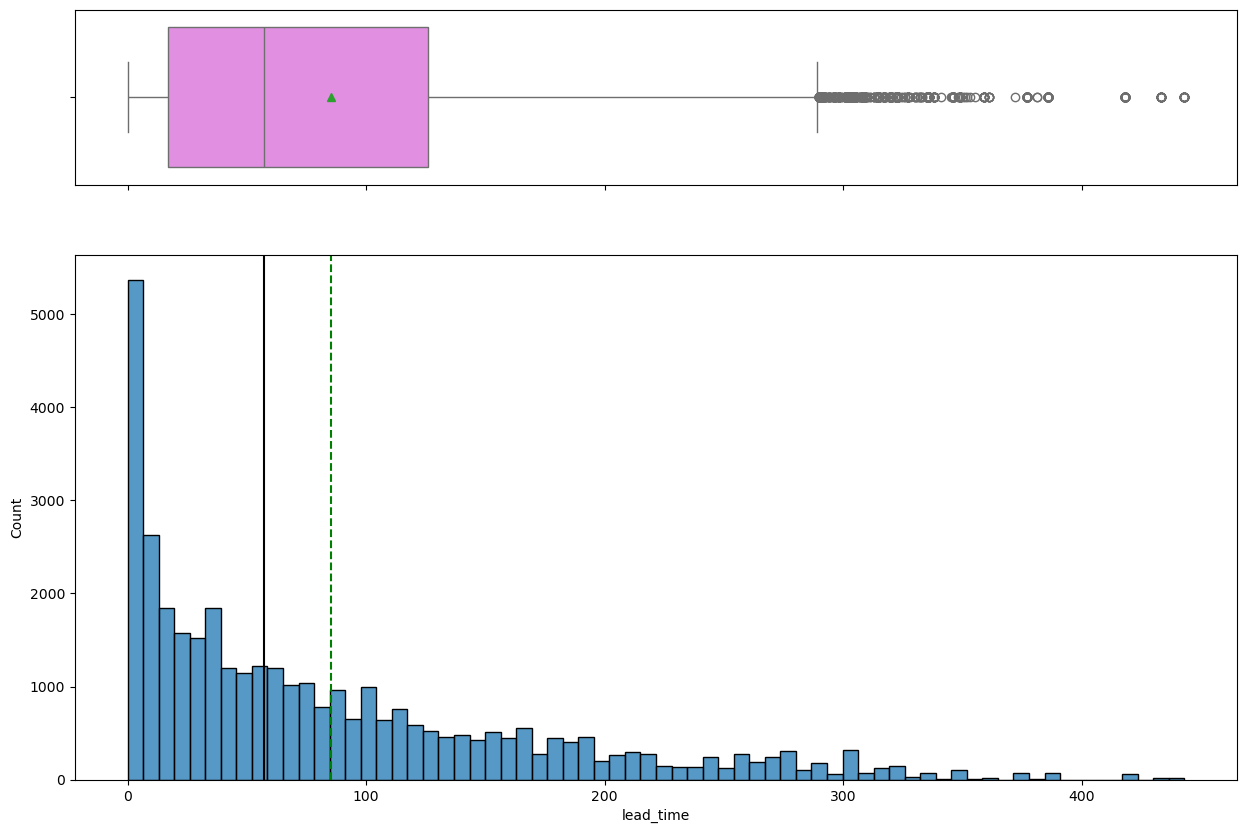

In [36]:
histogram_boxplot(data, "lead_time")

#### Distribution of avg_price_per_room

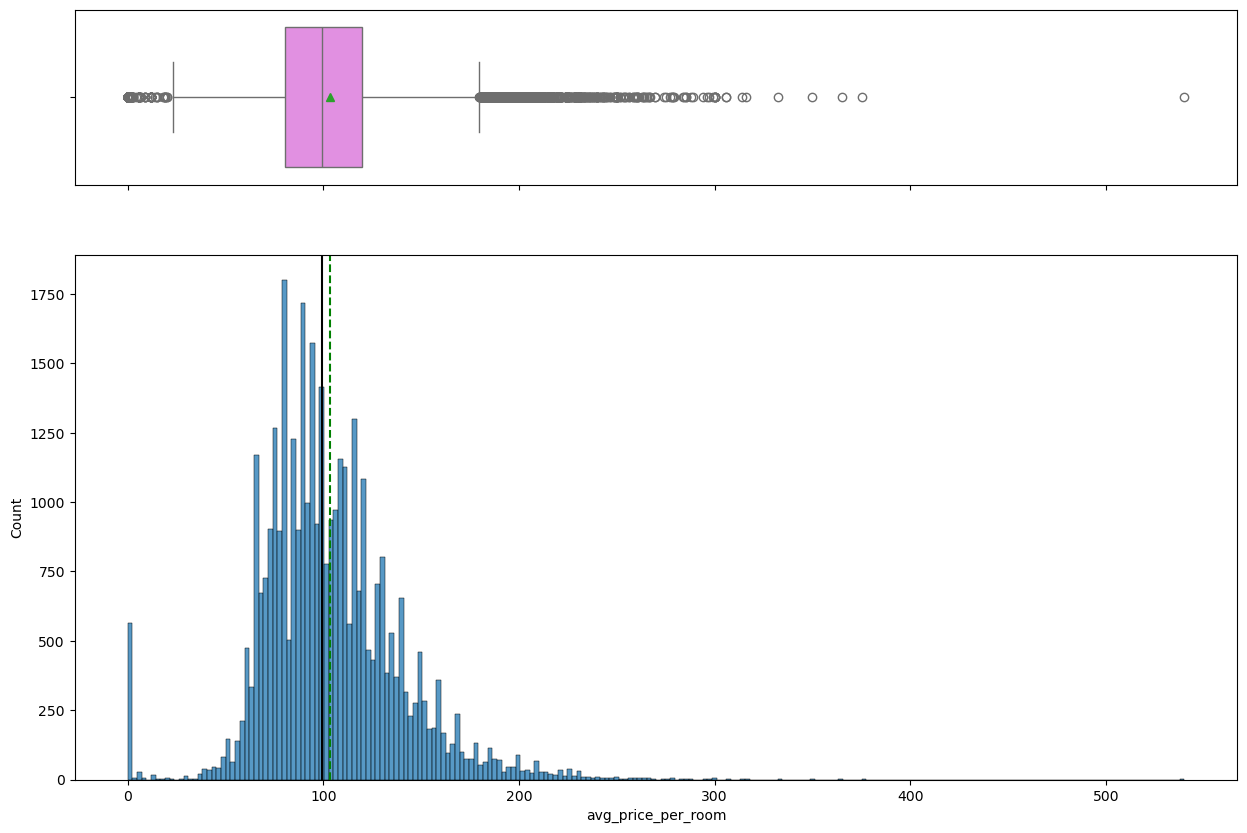

In [38]:
histogram_boxplot(data, "avg_price_per_room")  

#### Distribution of no_of_adults

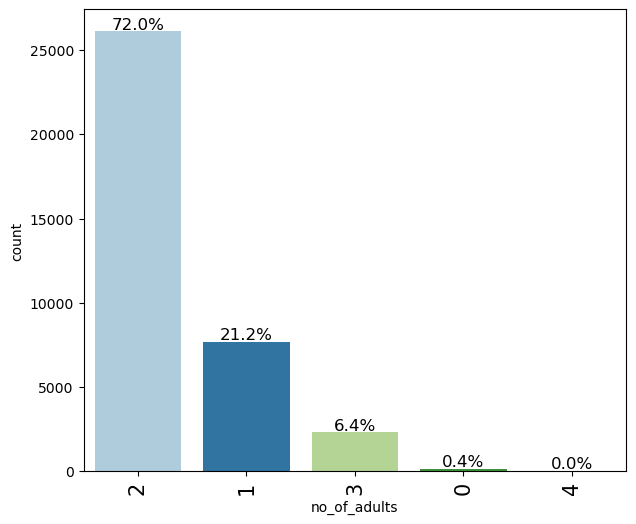

In [40]:
labeled_barplot(data,'no_of_adults', perc=True) 

#### Distribution of no_of_children

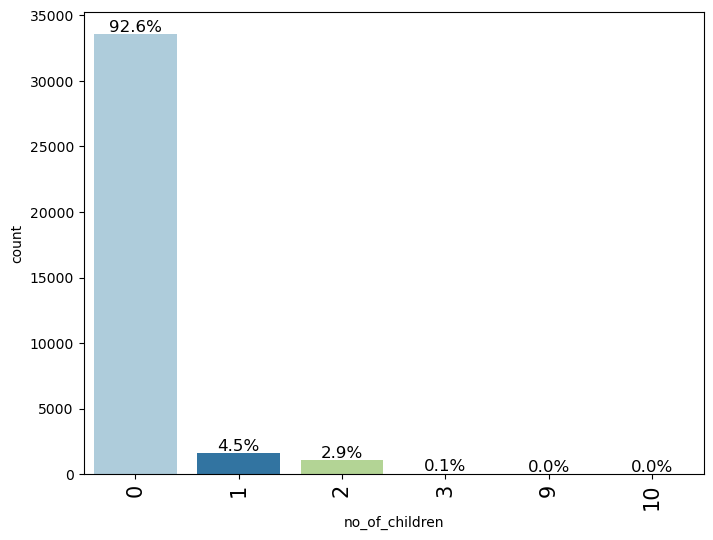

In [42]:
labeled_barplot(data,'no_of_children', perc=True)

#### Distribution of no_of_weekend_nights

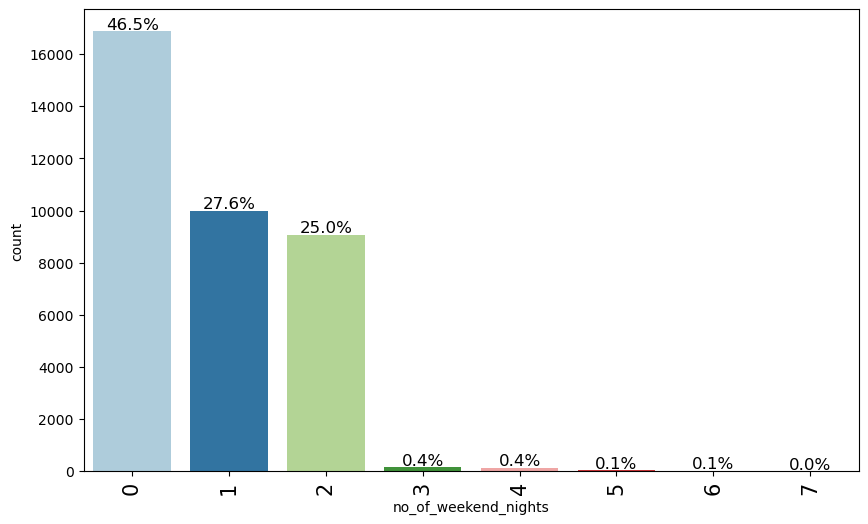

In [44]:
labeled_barplot(data, "no_of_weekend_nights", perc=True)

#### Distribution of no_of_week_nights

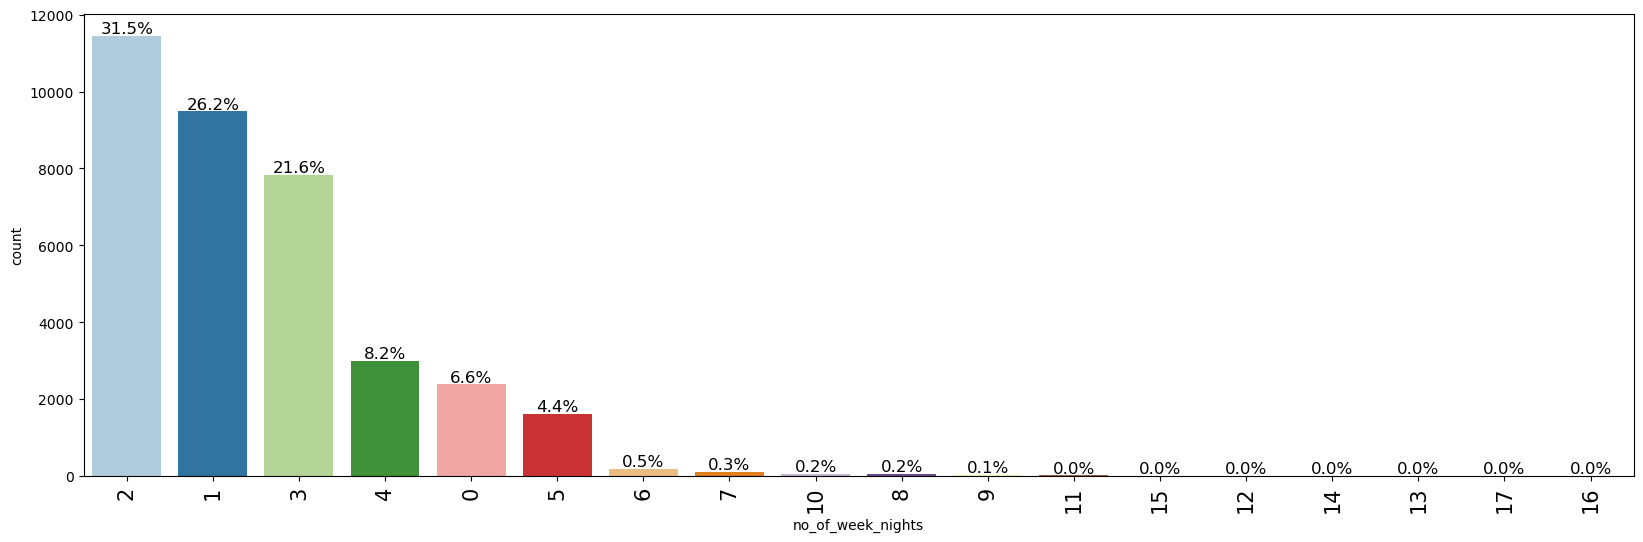

In [46]:
labeled_barplot(data, "no_of_week_nights", perc=True)

#### Distribution of type_of_meal_plan

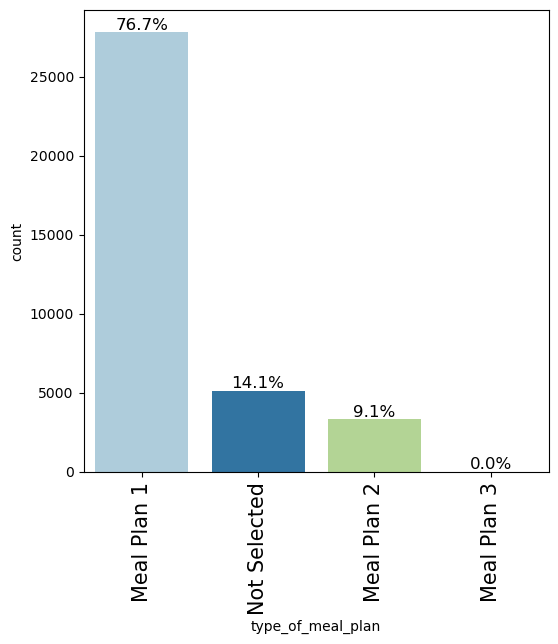

In [48]:
labeled_barplot(data, "type_of_meal_plan", perc=True)

#### Distribution of required_car_parking_space

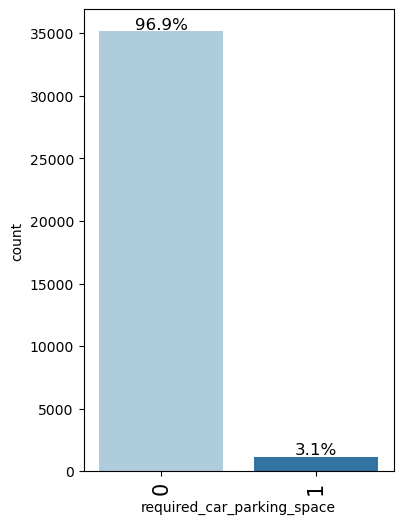

In [50]:
labeled_barplot(data, "required_car_parking_space", perc=True)

#### Distribution of room_type_reserved

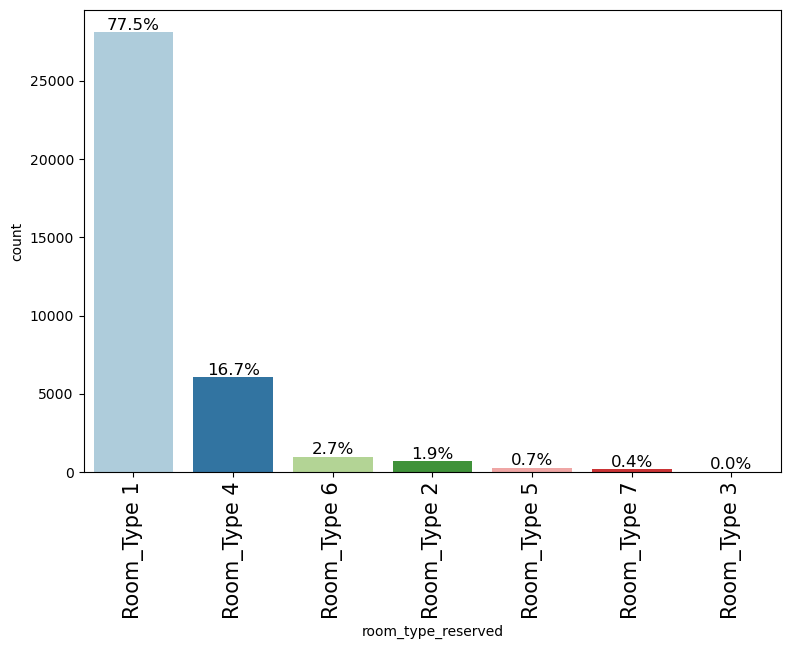

In [52]:
labeled_barplot(data, "room_type_reserved", perc=True)

#### Distribution of arrival_year, arrival_month & arrival_date 

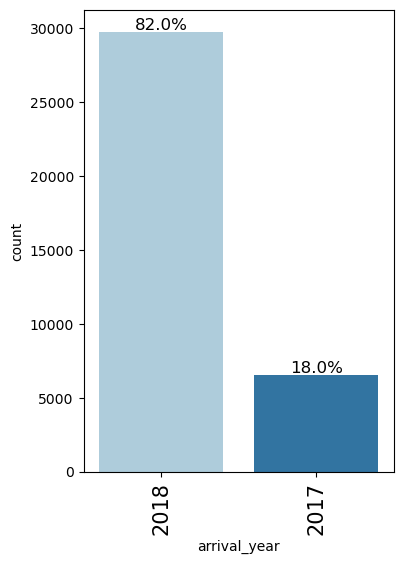

In [54]:
labeled_barplot(data, "arrival_year", perc=True)

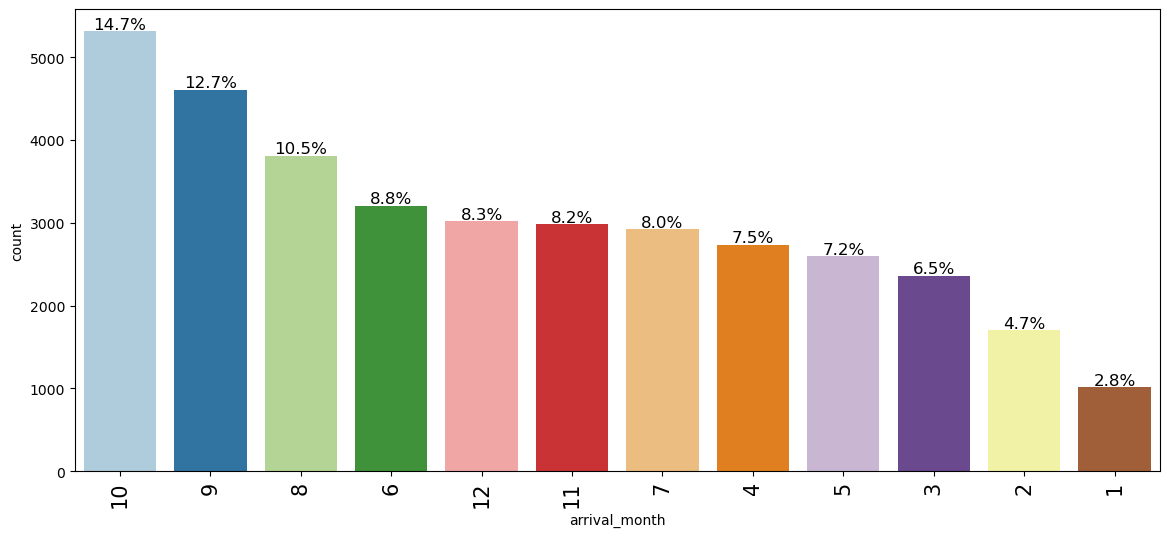

In [55]:
labeled_barplot(data, "arrival_month", perc=True)

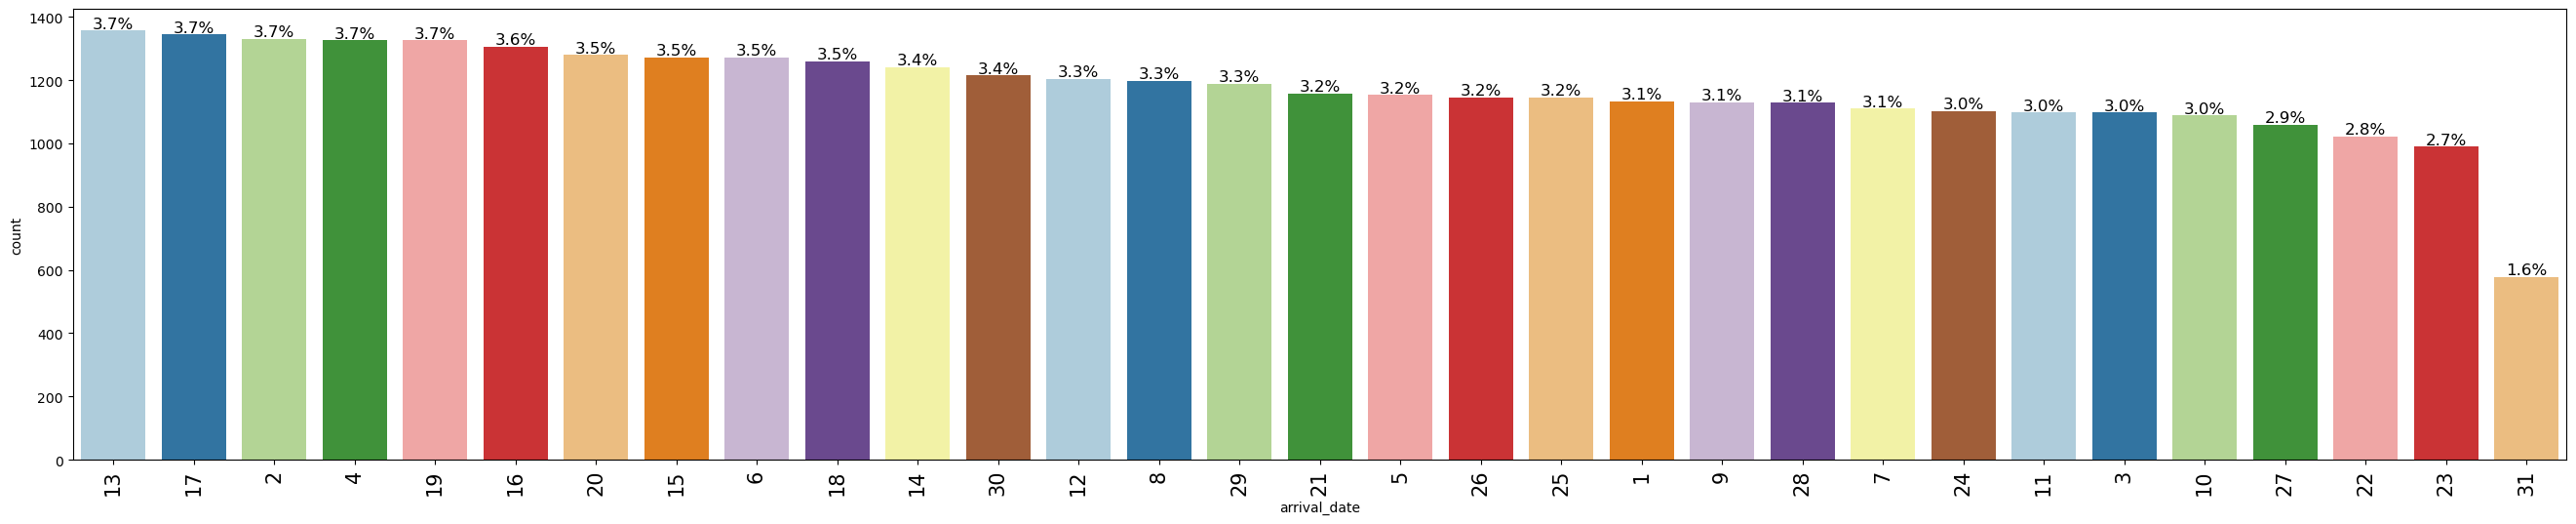

In [56]:
labeled_barplot(data, "arrival_date", perc=True)

#### Distribution of market_segment_type

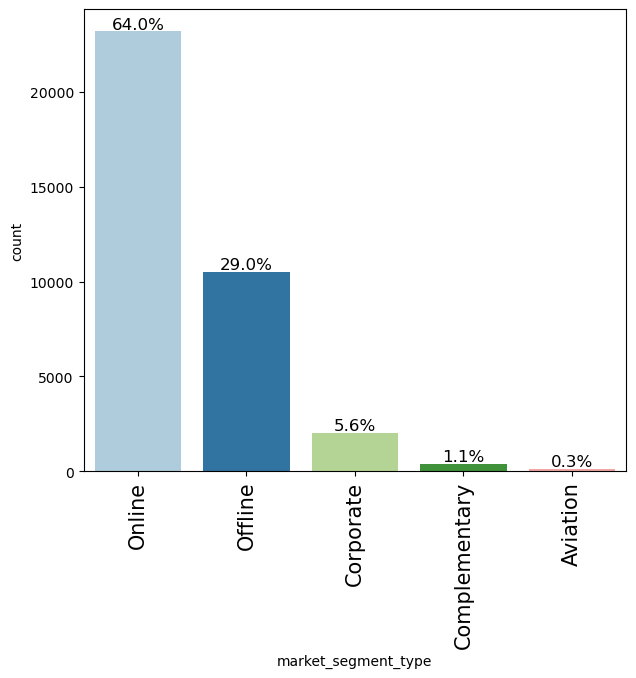

In [87]:
labeled_barplot(data, "market_segment_type", perc=True)

#### Distribution of no_of_previous_cancellations & no_of_previous_bookings_not_canceled

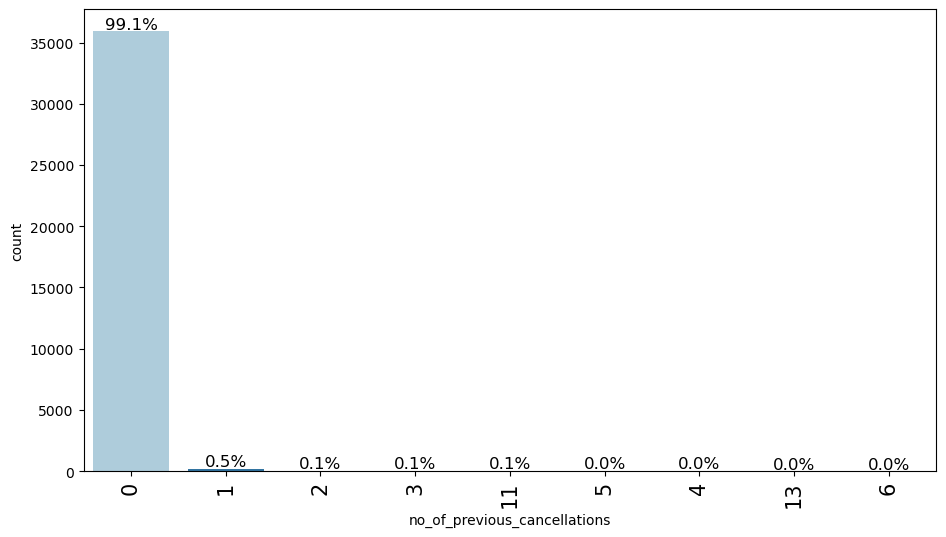

In [416]:
labeled_barplot(data, "no_of_previous_cancellations", perc=True)

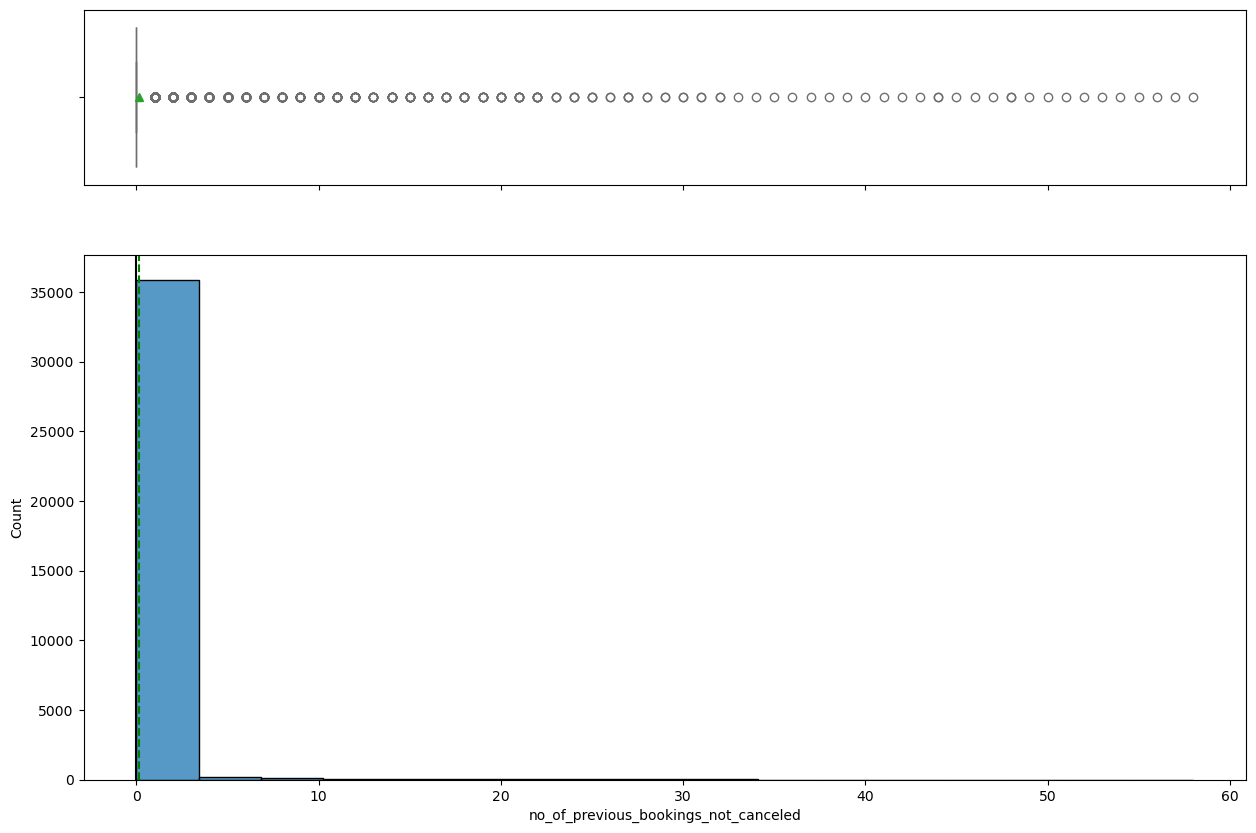

In [417]:
histogram_boxplot(data, "no_of_previous_bookings_not_canceled")  

#### Distribution of no_of_special_requests

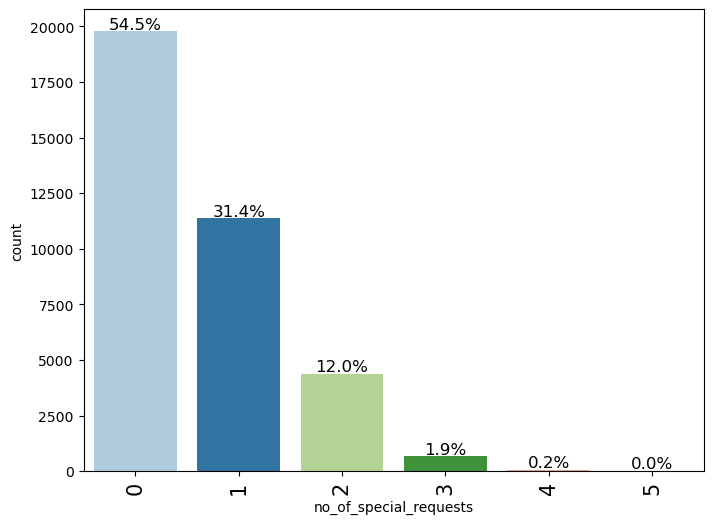

In [419]:
labeled_barplot(data, "no_of_special_requests", perc=True)

#### Distribution of repeated_guest

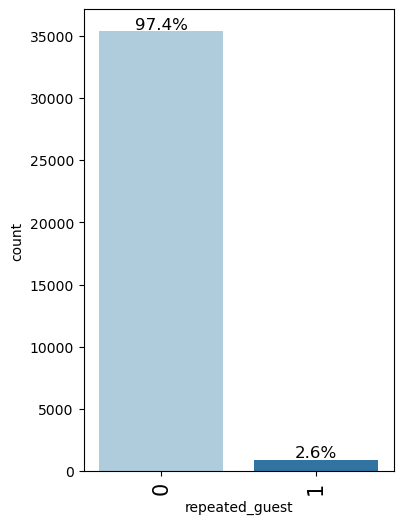

In [421]:
labeled_barplot(data, "repeated_guest", perc=True)

#### Distribution of booking_status

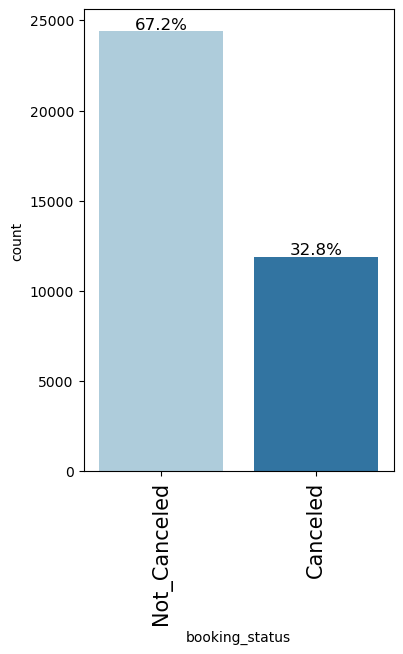

In [423]:
labeled_barplot(data, "booking_status", perc=True)

### Bivariate Analysis

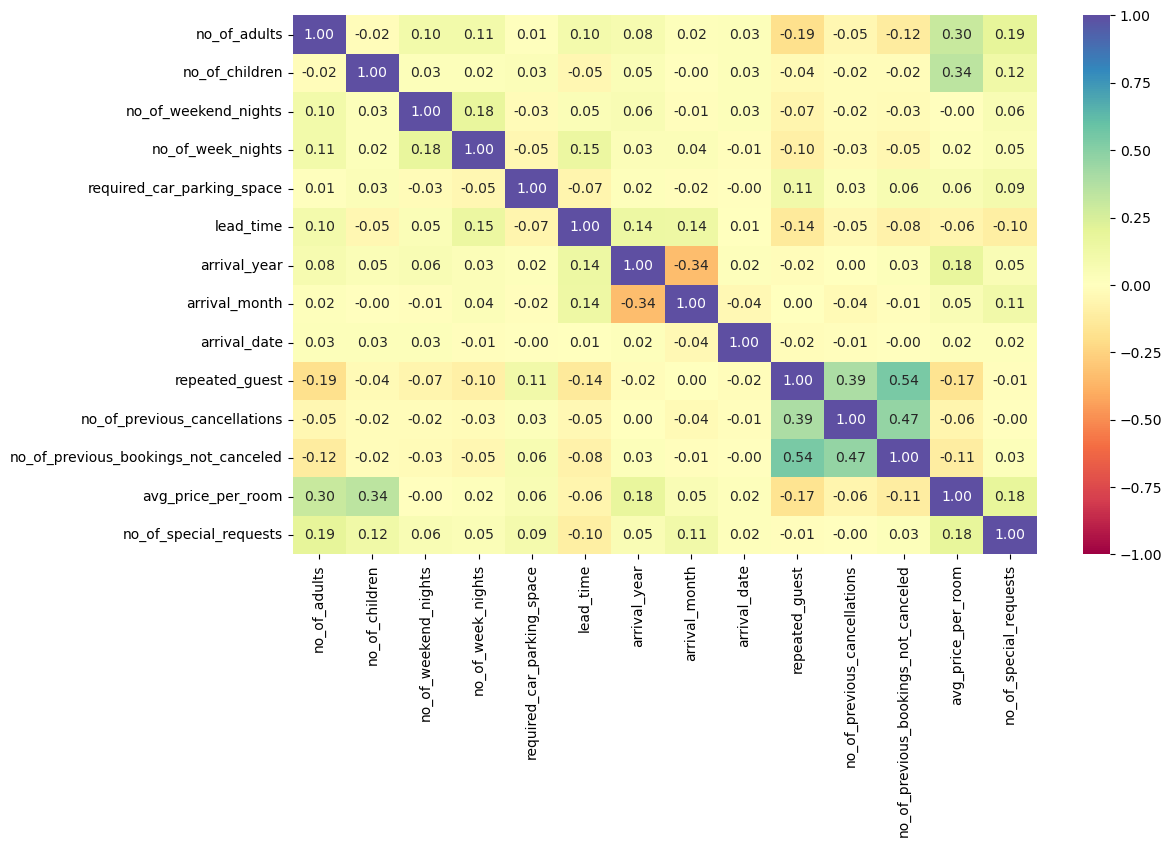

In [425]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

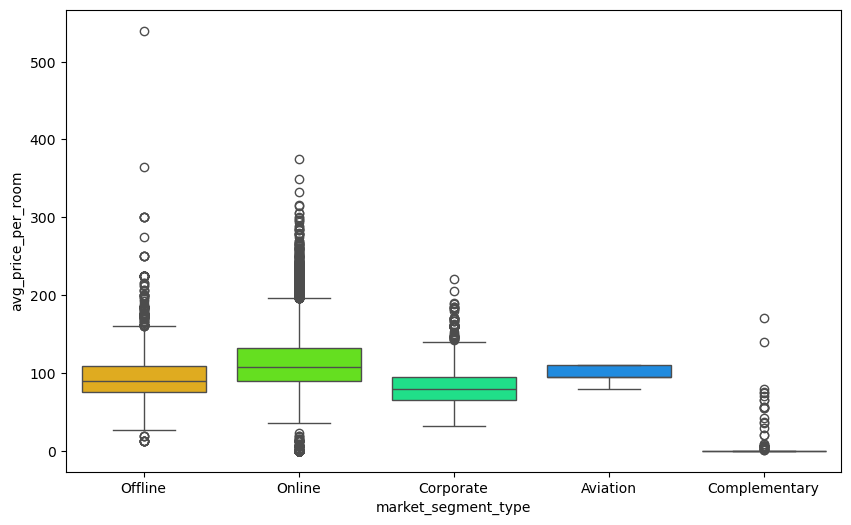

In [426]:
# difference in room prices in different market segment?
plt.figure(figsize=(10,6))
sns.boxplot(data=data,x='market_segment_type',y='avg_price_per_room',palette='gist_rainbow')
plt.show()

booking_status       Canceled  Not_Canceled    All
market_segment_type                               
All                     11885         24390  36275
Online                   8475         14739  23214
Offline                  3153          7375  10528
Corporate                 220          1797   2017
Aviation                   37            88    125
Complementary               0           391    391
------------------------------------------------------------------------------------------------------------------------


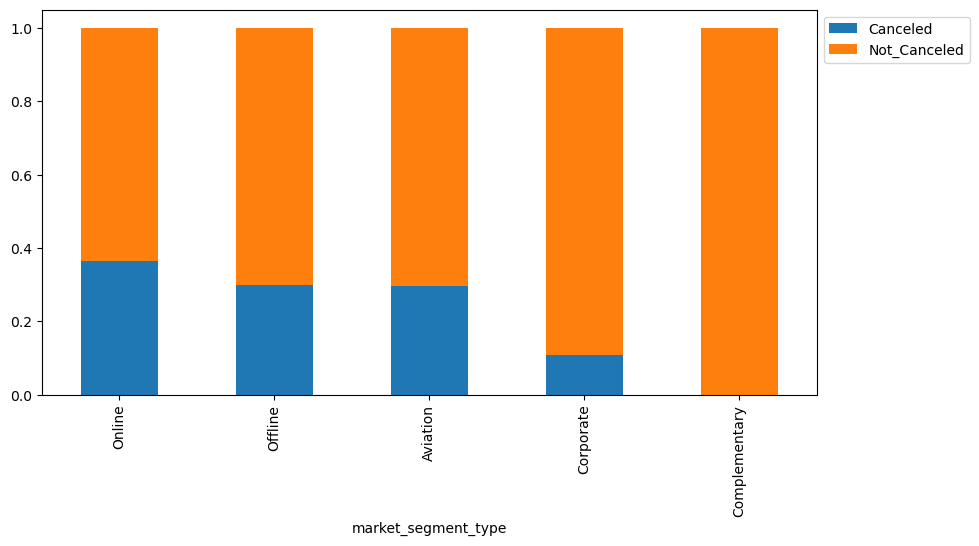

In [427]:
# market segment vs booking status
stacked_barplot(data,'market_segment_type','booking_status')

booking_status          Canceled  Not_Canceled    All
no_of_special_requests                               
All                        11885         24390  36275
0                           8545         11232  19777
1                           2703          8670  11373
2                            637          3727   4364
3                              0           675    675
4                              0            78     78
5                              0             8      8
------------------------------------------------------------------------------------------------------------------------


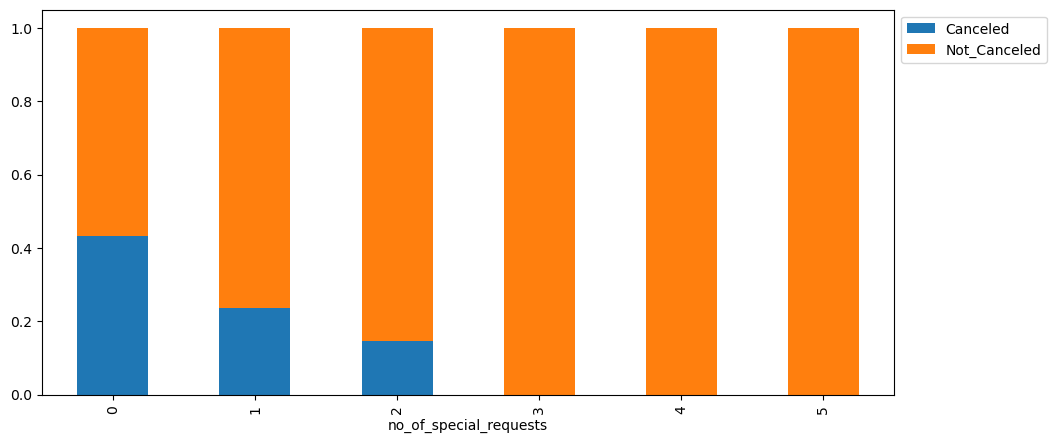

In [430]:
# Special reqiests vs booking status
stacked_barplot(data,'no_of_special_requests','booking_status')

booking_status  Canceled  Not_Canceled    All
arrival_month                                
All                11885         24390  36275
10                  1880          3437   5317
9                   1538          3073   4611
8                   1488          2325   3813
7                   1314          1606   2920
6                   1291          1912   3203
4                    995          1741   2736
5                    948          1650   2598
11                   875          2105   2980
3                    700          1658   2358
2                    430          1274   1704
12                   402          2619   3021
1                     24           990   1014
------------------------------------------------------------------------------------------------------------------------


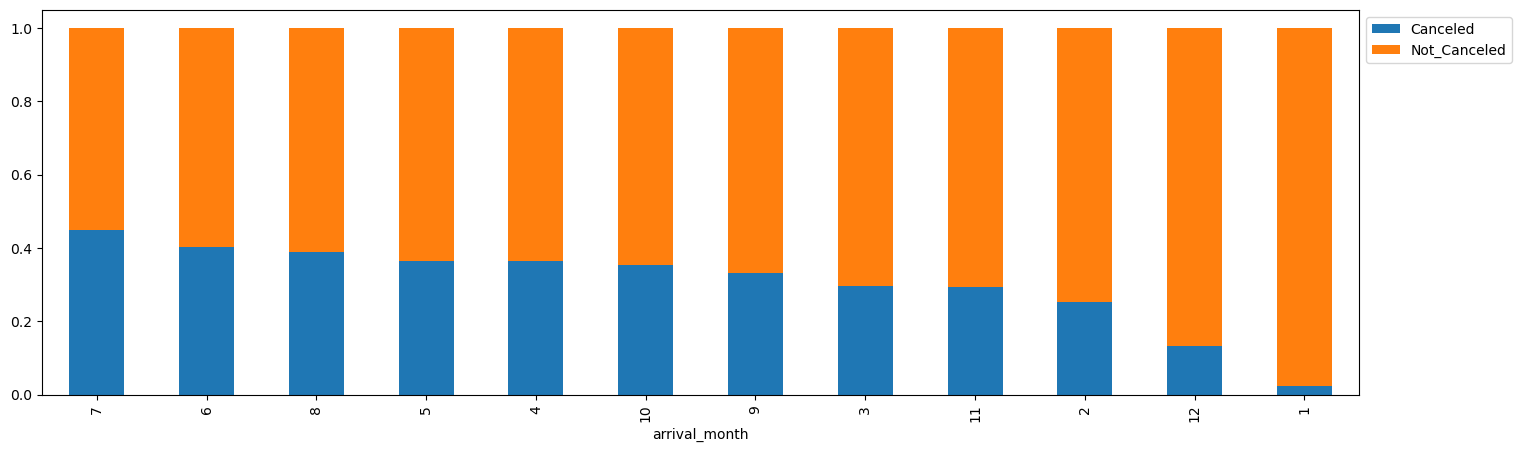

In [432]:
# Arrival Month vs booking status
stacked_barplot(data,'arrival_month','booking_status')

booking_status  Canceled  Not_Canceled    All
repeated_guest                               
All                11885         24390  36275
0                  11869         23476  35345
1                     16           914    930
------------------------------------------------------------------------------------------------------------------------


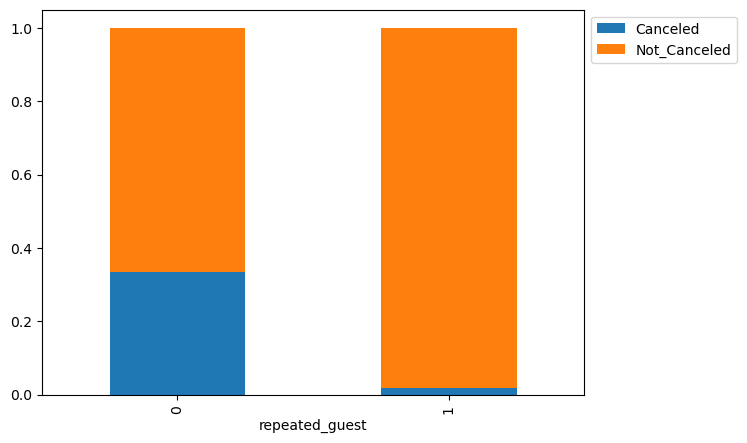

In [433]:
# Repeated Guest vs booking status
stacked_barplot(data,'repeated_guest','booking_status')

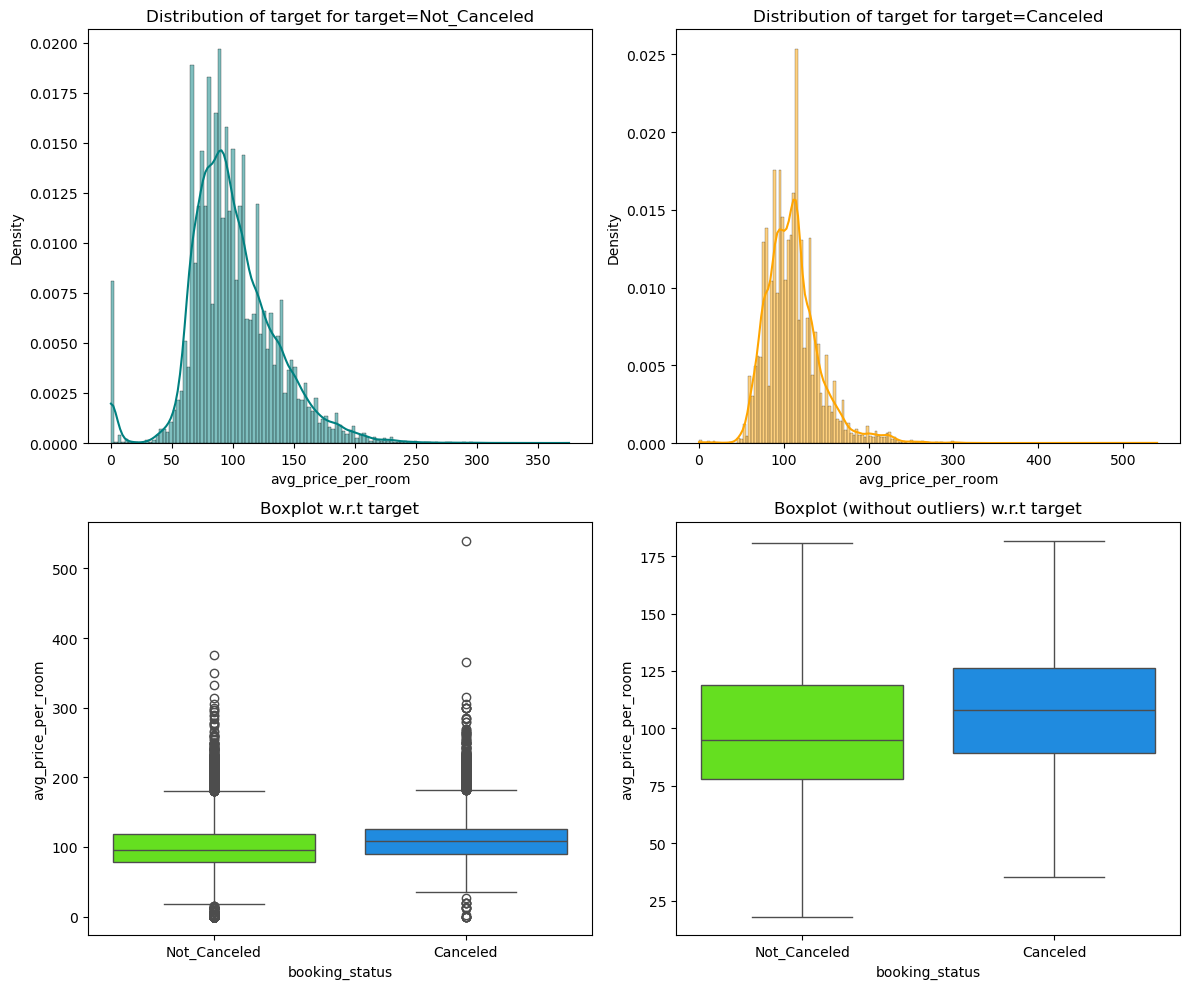

In [434]:
# Avg Price vs booking status
distribution_plot_wrt_target(data, 'avg_price_per_room', 'booking_status')

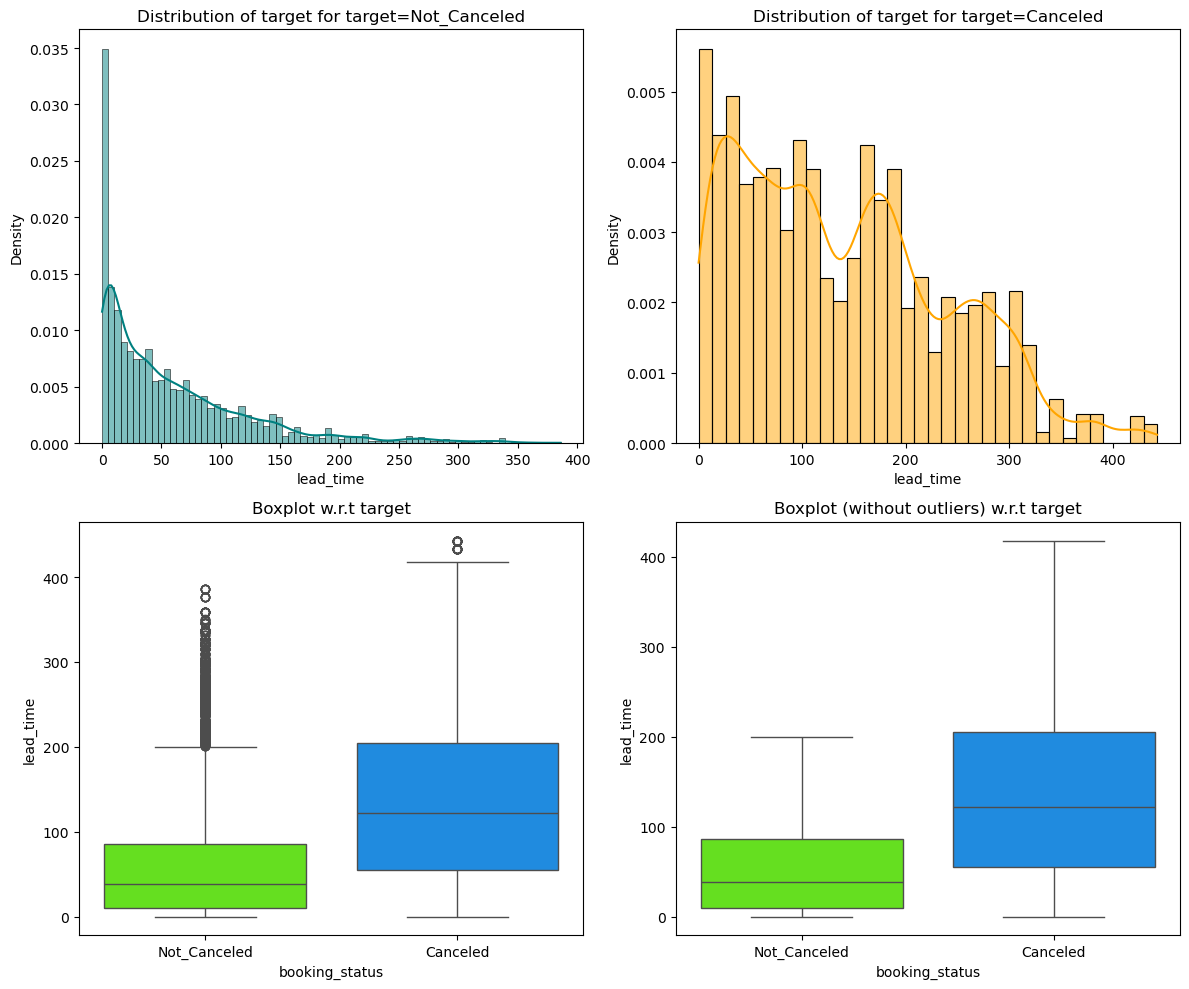

In [435]:
# Lead Time vs booking status
distribution_plot_wrt_target(data, 'lead_time', 'booking_status')

# **Data Preprocessing**

### Outlier Check

- Let's check for outliers in the data.

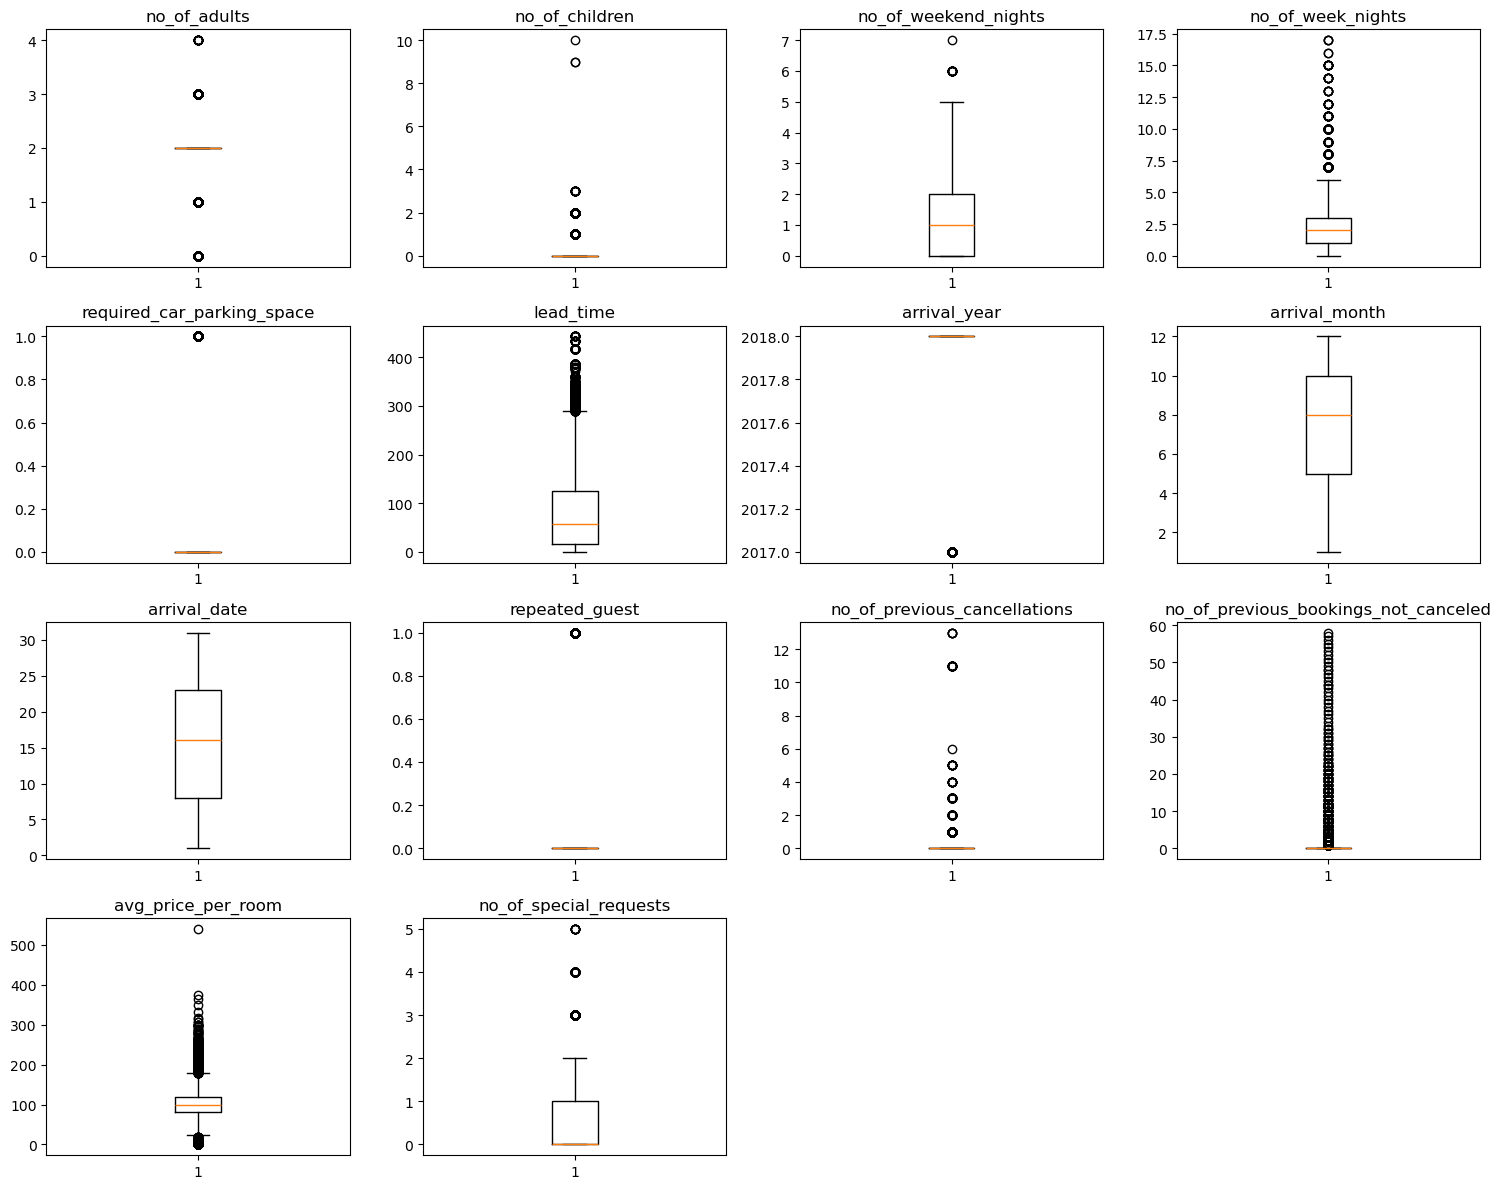

In [140]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [142]:
#Replacing 9 and 10 children with 3
data['no_of_children'] = data['no_of_children'].replace([9,10],3)

### Data Preparation for modeling

- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [148]:
X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

X = pd.get_dummies(X, drop_first=True)

X = X.astype(float)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

print(Y)
X

0        Not_Canceled
1        Not_Canceled
2            Canceled
3            Canceled
4            Canceled
             ...     
36270    Not_Canceled
36271        Canceled
36272    Not_Canceled
36273        Canceled
36274    Not_Canceled
Name: booking_status, Length: 36275, dtype: object


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2.00000,0.00000,1.00000,2.00000,0.00000,224.00000,2017.00000,10.00000,2.00000,0.00000,0.00000,0.00000,65.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000
1,2.00000,0.00000,2.00000,3.00000,0.00000,5.00000,2018.00000,11.00000,6.00000,0.00000,0.00000,0.00000,106.68000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
2,1.00000,0.00000,2.00000,1.00000,0.00000,1.00000,2018.00000,2.00000,28.00000,0.00000,0.00000,0.00000,60.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
3,2.00000,0.00000,0.00000,2.00000,0.00000,211.00000,2018.00000,5.00000,20.00000,0.00000,0.00000,0.00000,100.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
4,2.00000,0.00000,1.00000,1.00000,0.00000,48.00000,2018.00000,4.00000,11.00000,0.00000,0.00000,0.00000,94.50000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3.00000,0.00000,2.00000,6.00000,0.00000,85.00000,2018.00000,8.00000,3.00000,0.00000,0.00000,0.00000,167.80000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
36271,2.00000,0.00000,1.00000,3.00000,0.00000,228.00000,2018.00000,10.00000,17.00000,0.00000,0.00000,0.00000,90.95000,2.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
36272,2.00000,0.00000,2.00000,6.00000,0.00000,148.00000,2018.00000,7.00000,1.00000,0.00000,0.00000,0.00000,98.39000,2.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
36273,2.00000,0.00000,0.00000,3.00000,0.00000,63.00000,2018.00000,4.00000,21.00000,0.00000,0.00000,0.00000,94.50000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000


In [444]:
## Reset the index of y_train so that both x and y have same indexes for training dataset

y_train.reset_index(inplace = True, drop = True)

In [445]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Shape of Training set : ", y_train.shape)
print("Shape of test set : ", y_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)
Shape of Training set :  (25392,)
Shape of test set :  (10883,)
Percentage of classes in training set:
booking_status
Not_Canceled   0.67399
Canceled       0.32601
Name: proportion, dtype: float64
Percentage of classes in test set:
booking_status
Not_Canceled   0.66857
Canceled       0.33143
Name: proportion, dtype: float64


### Scaling the Data

In [150]:
sc = StandardScaler()

X_train_scaled = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(sc.transform(X_test), columns=X_test.columns)

In [152]:
X_train_scaled.head().T

,0,1,2,3,4
no_of_adults,0.29850,0.29850,0.29850,0.29850,0.29850
no_of_children,-0.26561,-0.26561,-0.26561,-0.26561,2.27271
no_of_weekend_nights,0.21880,0.21880,0.21880,1.37121,-0.93361
no_of_week_nights,0.57188,0.57188,1.28792,-1.57623,1.28792
required_car_parking_space,-0.17990,-0.17990,-0.17990,-0.17990,-0.17990
lead_time,1.33640,-0.07477,-0.08644,-0.28470,1.34806
arrival_year,0.46936,0.46936,0.46936,-2.13056,0.46936
arrival_month,0.18828,-1.44595,-1.11911,0.84197,1.16882
arrival_date,1.53204,0.95931,-1.10252,-1.33161,-1.67525
repeated_guest,-0.16067,-0.16067,-0.16067,-0.16067,-0.16067


# **Model Building**

## Model evaluation criterion

**Evaluation Metric of Choice**

*  High recall ensures the hotel accurately identifies most of the bookings that will not be cancelled. A model with high recall will result in fewer False Negatives (FN) (fewer missed bookings), reducing the risk of overbooking.
•	Missing a genuine booking (False Negative) can lead to significant business harm (Dissatisfied customers due to lack of room, refunds, compensation, and reputational damage).





First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification function will be used to check the model performance of models.
* The plot_confusion_matrix function will be used to plot the confusion matrix.

In [453]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification(model, predictors, target, threshold = 0.5):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    prob_pred = model.predict(predictors)
    class_pred = [1 if i >= threshold else 0 for i in prob_pred]

    acc = accuracy_score(target, class_pred)  # to compute Accuracy
    recall = recall_score(target, class_pred)  # to compute Recall
    precision = precision_score(target, class_pred)  # to compute Precision
    f1 = f1_score(target, class_pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [454]:
def plot_confusion_matrix(model, predictors, target, threshold = 0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    prob_pred = model.predict(predictors)
    class_pred = [1 if i >= threshold else 0 for i in prob_pred]
    cm = confusion_matrix(target, class_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Logistic Regression (with Statsmodel)

In [154]:
# Adding constant to data for Logistic Regression
X_train_with_intercept = SM.add_constant(X_train_scaled)
X_test_with_intercept = SM.add_constant(X_test_scaled)

In [158]:
X_train_with_intercept.head().T

,0,1,2,3,4
const,1.00000,1.00000,1.00000,1.00000,1.00000
no_of_adults,0.29850,0.29850,0.29850,0.29850,0.29850
no_of_children,-0.26561,-0.26561,-0.26561,-0.26561,2.27271
no_of_weekend_nights,0.21880,0.21880,0.21880,1.37121,-0.93361
no_of_week_nights,0.57188,0.57188,1.28792,-1.57623,1.28792
required_car_parking_space,-0.17990,-0.17990,-0.17990,-0.17990,-0.17990
lead_time,1.33640,-0.07477,-0.08644,-0.28470,1.34806
arrival_year,0.46936,0.46936,0.46936,-2.13056,0.46936
arrival_month,0.18828,-1.44595,-1.11911,0.84197,1.16882
arrival_date,1.53204,0.95931,-1.10252,-1.33161,-1.67525


In [458]:
#Encoding Training Set to avoid Logisitic Regression Error
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

LogisticReg = SM.Logit(y_train, X_train_with_intercept).fit()
print(LogisticReg.summary())

         Current function value: 0.424648
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Wed, 18 Dec 2024   Pseudo R-squ.:                  0.3274
Time:                        22:23:33   Log-Likelihood:                -10783.
converged:                      False   LL-Null:                       -16030.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                    1.5132    117.953      0.013      0.990    -229.670

### Checking Logistic Regression model performance on training set

In [461]:
y_pred = LogisticReg.predict(X_train_with_intercept)

In [462]:
logistic_reg_perf_train = model_performance_classification(
    LogisticReg, X_train_with_intercept, y_train
)
logistic_reg_perf_train

,Accuracy,Recall,Precision,F1
0,0.80498,0.89085,0.83175,0.86029


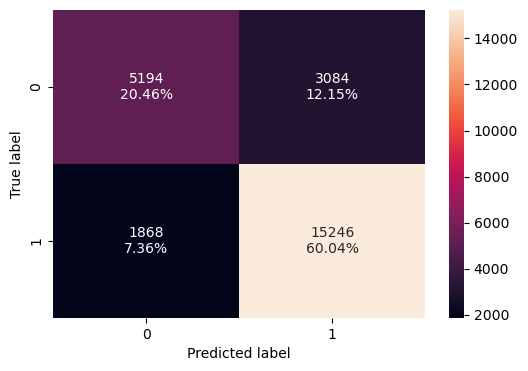

In [463]:
plot_confusion_matrix(LogisticReg, X_train_with_intercept, y_train)

### Checking Logistic Regression model performance on test set

In [466]:
logistic_reg_perf_test = model_performance_classification(
    LogisticReg, X_test_with_intercept, y_test
)
logistic_reg_perf_test

,Accuracy,Recall,Precision,F1
0,0.80731,0.89788,0.82833,0.86170


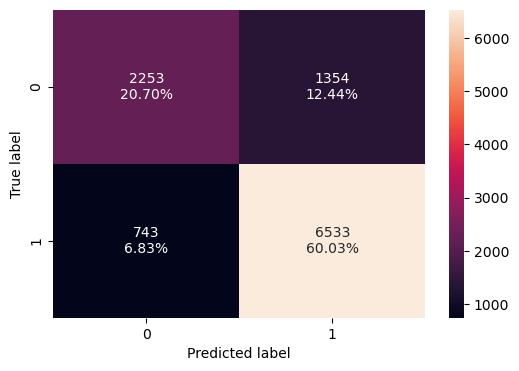

In [467]:
plot_confusion_matrix(LogisticReg, X_test_with_intercept, y_test)

## Naive - Bayes Classifier

In [469]:
#Build Naive Bayes Model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

### Checking Naive - Bayes Classifier performance on training set

In [471]:
nb_perf_train = model_performance_classification(nb_model,X_train,y_train)  ## get model performance on training data
nb_perf_train

,Accuracy,Recall,Precision,F1
0,0.41080,0.14357,0.88989,0.24725


##### Accuracy of NB = 67%

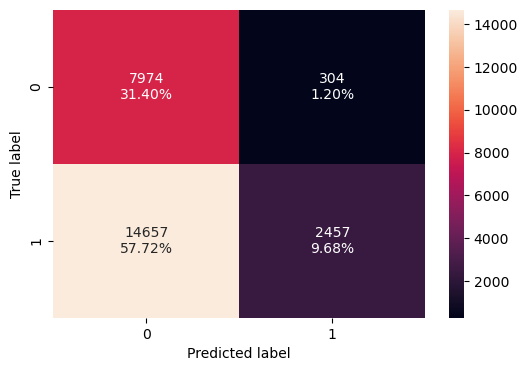

In [473]:
plot_confusion_matrix(nb_model,X_train,y_train)  ## create confusion matrix for training data

### Checking Naive - Bayes Classifier performance on test set

In [475]:
nb_perf_test = model_performance_classification(nb_model,X_test,y_test)  ## get model performance on test data
nb_perf_test

,Accuracy,Recall,Precision,F1
0,0.41726,0.14596,0.89244,0.25089


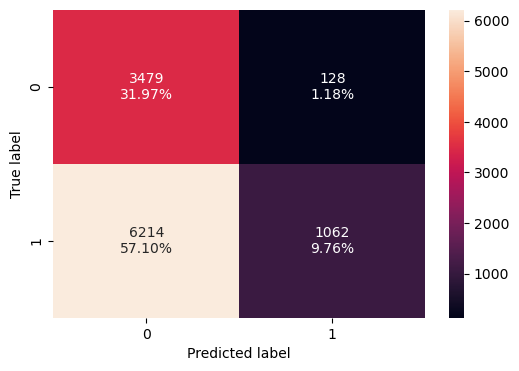

In [476]:
plot_confusion_matrix(nb_model,X_test,y_test)  ## create confusion matrix for test data

## KNN Classifier (K = 5)

In [478]:
#Build KNN Model
knn_model = KNeighborsClassifier(n_neighbors = 5)  ## build KNN model with nummber of neighbors as 5
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

### Checking KNN Classifier performance on training set

In [480]:
knn_perf_train = model_performance_classification(knn_model,X_train_scaled, y_train)  ## get model performance on training data
knn_perf_train

,Accuracy,Recall,Precision,F1
0,0.89178,0.93391,0.90812,0.92084


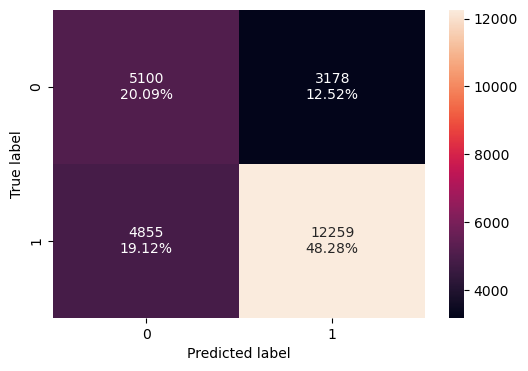

In [481]:
plot_confusion_matrix(knn_model,X_train,y_train)  ## create confusion matrix for training data

### Checking KNN Classifier performance on test set

In [483]:
knn_perf_test = model_performance_classification(knn_model,X_test,y_test)  ## get model performance on test data
knn_perf_test

,Accuracy,Recall,Precision,F1
0,0.69200,0.72347,0.79709,0.75850


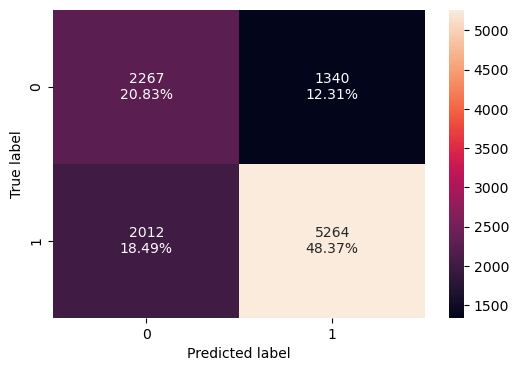

In [484]:
plot_confusion_matrix(knn_model,X_test,y_test)  ## create confusion matrix for test data

## Decision Tree Classifier

In [556]:
dt_model = DecisionTreeClassifier(random_state=42, class_weight="balanced")
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

### Checking Decision Tree Classifier performance on training set

In [558]:
decision_tree_perf_train = model_performance_classification(dt_model,X_train,y_train)  ## get model performance on training data
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,0.99366,0.99369,0.99689,0.99529


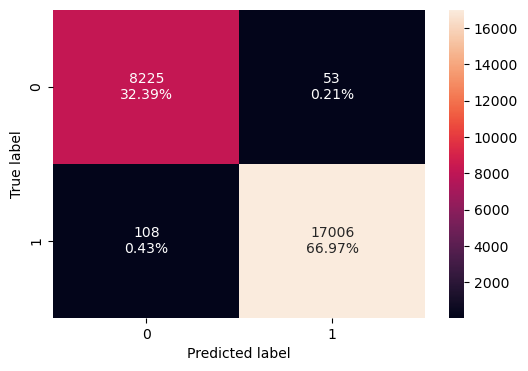

In [560]:
plot_confusion_matrix(dt_model,X_train,y_train)  ## create confusion matrix for training data

### Checking Decision Tree Classifier performance on test set

In [562]:
decision_tree_perf_test = model_performance_classification(dt_model,X_test,y_test)  ## Complete the code to get model performance on test data
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.86566,0.89775,0.90097,0.89935


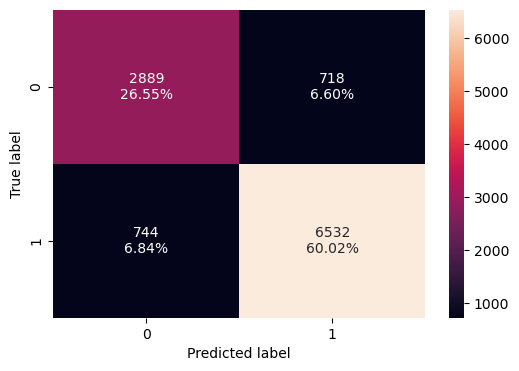

In [564]:
plot_confusion_matrix(dt_model,X_test,y_test)  ## Complete the code to create confusion matrix for test data

# **Model Performance Improvement**

## Logistic Regression (deal with multicollinearity, remove high p-value variables, determine optimal threshold 	using ROC curve)

### Logistic Regression - Dealing with Multicollinearity

In [566]:
def calculate_vif(idf):
    """
    Calculate Variance Inflation Factor (VIF) for each variable in a DataFrame.

    Parameters:
    df (DataFrame): Input DataFrame containing numerical variables.

    Returns:
    vif_df (DataFrame): DataFrame containing variable names and their corresponding VIF values.
    """
    variables = idf.values
    vif_df = pd.DataFrame()
    vif_df["Variable"] = idf.columns
    vif_df["VIF"] = [variance_inflation_factor(variables, i) for i in range(idf.shape[1])]
    return vif_df

In [568]:
# Call the function to calculate VIF
vif_result = calculate_vif(X_train)  ## Complete the code to calculate VIF for the X_train data with intercept

print("Variance Inflation Factors:")
print(vif_result)

Variance Inflation Factors:
                                Variable       VIF
0                           no_of_adults  18.31196
1                         no_of_children   2.24145
2                   no_of_weekend_nights   1.99085
3                      no_of_week_nights   3.80349
4             required_car_parking_space   1.07063
5                              lead_time   2.47704
6                           arrival_year 330.07536
7                          arrival_month   7.24184
8                           arrival_date   4.23159
9                         repeated_guest   1.81164
10          no_of_previous_cancellations   1.37492
11  no_of_previous_bookings_not_canceled   1.62522
12                    avg_price_per_room  18.76434
13                no_of_special_requests   2.01387
14         type_of_meal_plan_Meal Plan 2   1.32162
15         type_of_meal_plan_Meal Plan 3   1.00614
16        type_of_meal_plan_Not Selected   1.44214
17        room_type_reserved_Room_Type 2   1.11774
18 

In [570]:
# # Dropping columns with VIF > 5 iteratively
i_vif = 0
while vif_result['VIF'].max() > 5: 
     high_vif_column = vif_result.loc[vif_result['VIF'].idxmax(), 'Variable']
     print("Dropping {high_vif_column} due to high VIF")
     X_train_scaled.drop(columns=high_vif_column, inplace=True)
     X_test_scaled.drop(columns=high_vif_column, inplace=True)
     vif_result = calculate_vif(X_train_scaled)
     i_vif = i_vif + 1
     print('Iteraction: ',i_vif,' | \n','VIF Result',vif_result)

Dropping {high_vif_column} due to high VIF
Iteraction:  1  | 
 VIF Result                                 Variable      VIF
0                           no_of_adults  1.34286
1                         no_of_children  2.09375
2                   no_of_weekend_nights  1.06368
3                      no_of_week_nights  1.09154
4             required_car_parking_space  1.03707
5                              lead_time  1.24337
6                          arrival_month  1.05172
7                           arrival_date  1.00672
8                         repeated_guest  1.76603
9           no_of_previous_cancellations  1.36946
10  no_of_previous_bookings_not_canceled  1.61333
11                    avg_price_per_room  1.93212
12                no_of_special_requests  1.24470
13         type_of_meal_plan_Meal Plan 2  1.19987
14         type_of_meal_plan_Meal Plan 3  1.00606
15        type_of_meal_plan_Not Selected  1.23990
16        room_type_reserved_Room_Type 2  1.09582
17        room_type_reserv

### Dealing with high p-value variables

In [571]:
# initial list of columns
predictors = X_train_with_intercept.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = SM.Logit(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()
    print(f"Dropping column {feature_with_p_max} with p-value: {max_p_value}")

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

         Current function value: 0.424648
         Iterations: 35
Dropping column type_of_meal_plan_Meal Plan 3 with p-value: 0.9980948237800454
         Current function value: 0.424691
         Iterations: 35
Dropping column market_segment_type_Complementary with p-value: 0.999846810893133
Optimization terminated successfully.
         Current function value: 0.425156
         Iterations 10
Dropping column room_type_reserved_Room_Type 3 with p-value: 0.6592300245936387
Optimization terminated successfully.
         Current function value: 0.425160
         Iterations 10
Dropping column no_of_previous_bookings_not_canceled with p-value: 0.41910535611042854
Optimization terminated successfully.
         Current function value: 0.425180
         Iterations 9
Dropping column arrival_date with p-value: 0.20024915838999424
Optimization terminated successfully.
         Current function value: 0.425212
         Iterations 9
Dropping column market_segment_type_Corporate with p-value: 0.16243

In [576]:
X_train_significant = X_train_with_intercept[selected_features]
X_test_significant = X_test_with_intercept[selected_features]  ## get the test data with selected features
X_train_significant.head(10)

,const,no_of_adults,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Offline,market_segment_type_Online
0,1.00000,0.29850,0.21880,0.57188,-0.17990,1.33640,0.46936,0.18828,-0.16067,-0.06313,-0.35749,-0.78611,-0.31846,-0.40381,-0.14144,-0.44785,-0.08590,-0.16425,-0.06626,-0.64120,0.75262
1,1.00000,0.29850,0.21880,0.57188,-0.17990,-0.07477,0.46936,-1.44595,-0.16067,-0.06313,-0.35749,0.48528,-0.31846,-0.40381,-0.14144,-0.44785,-0.08590,-0.16425,-0.06626,-0.64120,0.75262
2,1.00000,0.29850,0.21880,1.28792,-0.17990,-0.08644,0.46936,-1.11911,-0.16067,-0.06313,-0.11509,0.48528,-0.31846,-0.40381,-0.14144,2.23290,-0.08590,-0.16425,-0.06626,-0.64120,0.75262
3,1.00000,0.29850,1.37121,-1.57623,-0.17990,-0.28470,-2.13056,0.84197,-0.16067,-0.06313,-0.35606,-0.78611,-0.31846,-0.40381,-0.14144,-0.44785,-0.08590,-0.16425,-0.06626,1.55958,-1.32869
4,1.00000,0.29850,-0.93361,1.28792,-0.17990,1.34806,0.46936,1.16882,-0.16067,-0.06313,-0.60473,3.02807,-0.31846,-0.40381,-0.14144,-0.44785,-0.08590,-0.16425,-0.06626,-0.64120,0.75262
5,1.00000,0.29850,-0.93361,-0.14416,-0.17990,-0.85617,0.46936,-1.77280,-0.16067,-0.06313,1.92533,-0.78611,-0.31846,-0.40381,-0.14144,-0.44785,-0.08590,6.08843,-0.06626,-0.64120,0.75262
6,1.00000,0.29850,-0.93361,-0.86019,-0.17990,-0.90282,0.46936,-1.77280,-0.16067,-0.06313,-0.52717,-0.78611,-0.31846,-0.40381,-0.14144,-0.44785,-0.08590,-0.16425,-0.06626,-0.64120,0.75262
7,1.00000,-1.62816,0.21880,-0.86019,-0.17990,2.51432,0.46936,-0.13857,-0.16067,-0.06313,-0.38458,-0.78611,3.14015,-0.40381,-0.14144,-0.44785,-0.08590,-0.16425,-0.06626,1.55958,-1.32869
8,1.00000,-1.62816,0.21880,-0.14416,-0.17990,-0.26138,0.46936,-0.79226,-0.16067,-0.06313,0.75612,0.48528,-0.31846,-0.40381,-0.14144,-0.44785,-0.08590,-0.16425,-0.06626,-0.64120,-1.32869
9,1.00000,0.29850,0.21880,-0.14416,-0.17990,-0.33135,0.46936,-0.46541,-0.16067,-0.06313,-0.36547,0.48528,-0.31846,-0.40381,-0.14144,-0.44785,-0.08590,-0.16425,-0.06626,1.55958,-1.32869


### Training the Logistic Regression model again with only the significant features

In [578]:
LogisticReg_tuned = SM.Logit(y_train,X_train_significant).fit()  ## train the Logistic Regression model with significant features
print(LogisticReg_tuned.summary())

Optimization terminated successfully.
         Current function value: 0.425319
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25371
Method:                           MLE   Df Model:                           20
Date:                Wed, 18 Dec 2024   Pseudo R-squ.:                  0.3263
Time:                        22:24:56   Log-Likelihood:                -10800.
converged:                       True   LL-Null:                       -16030.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              1.1866      0.023     50.623     

### Determining optimal threshold using ROC Curve

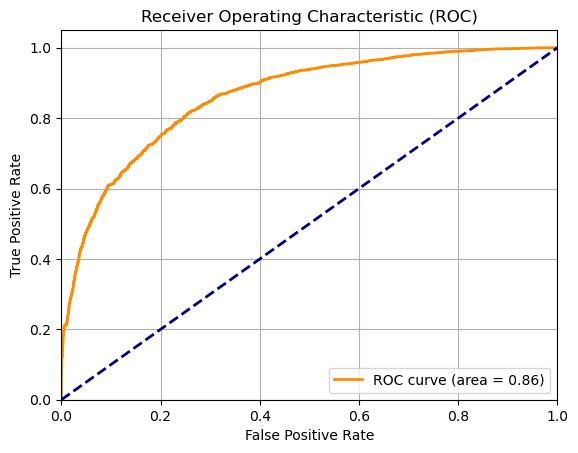

In [580]:
y_pred = LogisticReg_tuned.predict(X_train_significant)
fpr, tpr, thresholds = roc_curve(y_train, y_pred)

# Plot ROC curve
roc_auc = roc_auc_score(y_train, y_pred)  ## get the ROC-AUC score
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [582]:
# Find the optimal threshold
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_logit = round(thresholds[optimal_idx], 3)
print("\nOptimal Threshold: ", optimal_threshold_logit)


Optimal Threshold:  0.637


### Checking tuned Logistic Regression model performance on training set

In [584]:
logistic_reg_tune_perf_train = model_performance_classification(
    LogisticReg_tuned, X_train_significant, y_train, optimal_threshold_logit
)
logistic_reg_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.79214,0.81647,0.86735,0.84114


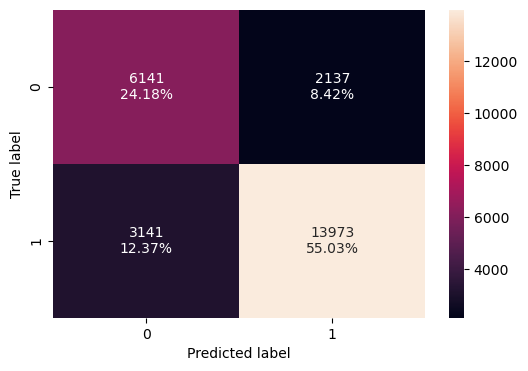

In [586]:
plot_confusion_matrix(LogisticReg_tuned, X_train_significant, y_train, optimal_threshold_logit)

### Checking tuned Logistic Regression model performance on test set

In [588]:
logistic_reg_tune_perf_test = model_performance_classification(
    LogisticReg_tuned, X_test_significant, y_test, optimal_threshold_logit
)

logistic_reg_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.79261,0.82614,0.85835,0.84194


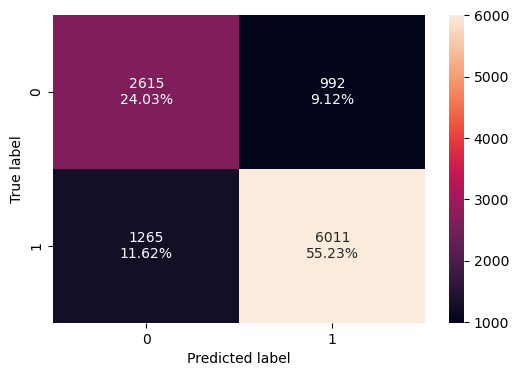

In [590]:
plot_confusion_matrix(LogisticReg_tuned, X_test_significant, y_test, optimal_threshold_logit)

## KNN Classifier (different values of K)

### KNN Classifier Performance Improvement using different k values

In [592]:
# Define the range for k values
k_values = range(2,21)  ## range for k-values between 2 and 20 (both inclusive)

# Initialize variables to store the best k and the highest recall score
best_k = 0
best_recall = 0

# Loop through each k value
for k in k_values:
    # Create and fit the KNN classifier with the current k value
    knn = KNeighborsClassifier(n_neighbors = k)  ## build KNN model with nummber of neighbors as k in each iteration
    knn.fit(X_train_scaled, y_train)

    # Predict on the test set
    y_pred = knn.predict(X_test_scaled)

    # Calculate the recall score
    recall = recall_score(y_test, y_pred)

    # Print the recall score for the current k value
    print(f'Recall for k={k}: {recall}')

    # Update the best k and best recall score if the current recall is higher
    if recall > best_recall:
        best_recall = recall
        best_k = k

# Print the best k value and its recall score
print(f'\nThe best value of k is: {best_k} with a recall of: {best_recall}')

Recall for k=2: 0.7953545904343046
Recall for k=3: 0.9007696536558548
Recall for k=4: 0.850329851566795
Recall for k=5: 0.9033809785596482
Recall for k=6: 0.8713578889499725
Recall for k=7: 0.9061297416162727
Recall for k=8: 0.8848268279274326
Recall for k=9: 0.9097031335898845
Recall for k=10: 0.8873007146783948
Recall for k=11: 0.9092908191313909
Recall for k=12: 0.8919736118746564
Recall for k=13: 0.9097031335898845
Recall for k=14: 0.892935678944475
Recall for k=15: 0.9106652006597031
Recall for k=16: 0.8970588235294118
Recall for k=17: 0.9116272677295217
Recall for k=18: 0.8982957669048928
Recall for k=19: 0.9116272677295217
Recall for k=20: 0.9010445299615173

The best value of k is: 17 with a recall of: 0.9116272677295217


In [594]:
knn_tuned = KNeighborsClassifier(n_neighbors =3)  ## build KNN model with nummber 3 of neighbors as best_k
knn_tuned.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

### Checking tuned KNN model performance on training set

In [596]:
knn_tuned_perf_train = model_performance_classification(knn_tuned,X_train_scaled,y_train)  ## get model performance on training data
knn_tuned_perf_train

,Accuracy,Recall,Precision,F1
0,0.91167,0.94548,0.92510,0.93518


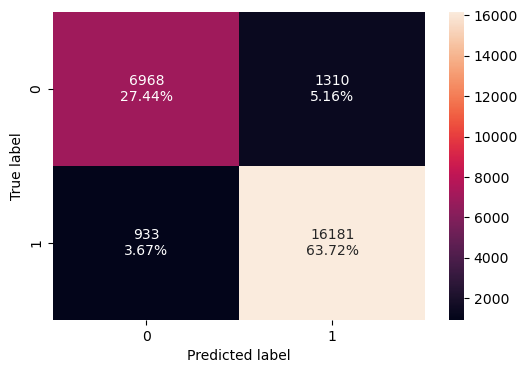

In [598]:
plot_confusion_matrix(knn_tuned,X_train_scaled,y_train)  ## create confusion matrix for training data

### Checking tuned KNN model performance on test set

In [600]:
knn_tuned_perf_test = model_performance_classification(knn_tuned,X_test_scaled,y_test)  ## get model performance on test data
knn_tuned_perf_test

,Accuracy,Recall,Precision,F1
0,0.84820,0.90077,0.87573,0.88808


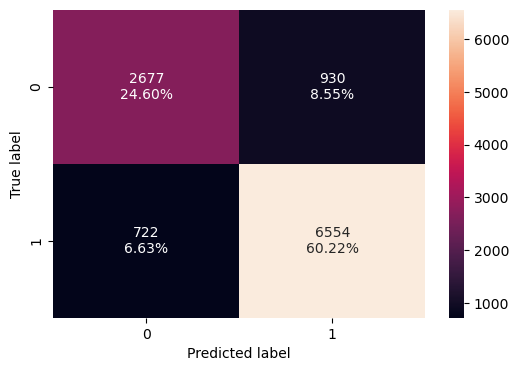

In [602]:
plot_confusion_matrix(knn_tuned,X_test_scaled,y_test)  ## create confusion matrix for test data

## Decision Tree Classifier (Pre-pruning & Post-pruning)

### Pre-pruning the tree

In [604]:
# Choose the type of classifier.
dt_model_tuned = DecisionTreeClassifier(random_state=42, class_weight="balanced")

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(5, 13, 2),                          ## Max Depth of the decision tree
    "max_leaf_nodes": [10, 20, 30, 50, 70, 100],               ## Maximum number of leaf nodes
    "min_samples_split": [2, 6, 7, 10, 20, 30],                ## Minimum number of samples required to split an internal node
    "class_weight": ['balanced', None]                         ## whether or not to used balanced weights for impurity computations
}

# # Type of scoring used to compare parameter combinations
# acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(dt_model_tuned, parameters, scoring='recall', cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dt_model_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dt_model_tuned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=11, max_leaf_nodes=100, min_samples_split=30,
                       random_state=42)

### Checking tuned Decision Tree Classifier performance on training set

In [610]:
decision_tree_tuned_perf_train = model_performance_classification(dt_model_tuned,X_train,y_train)  ## get model performance on training data
decision_tree_tuned_perf_train

,Accuracy,Recall,Precision,F1
0,0.87571,0.92906,0.89116,0.90972


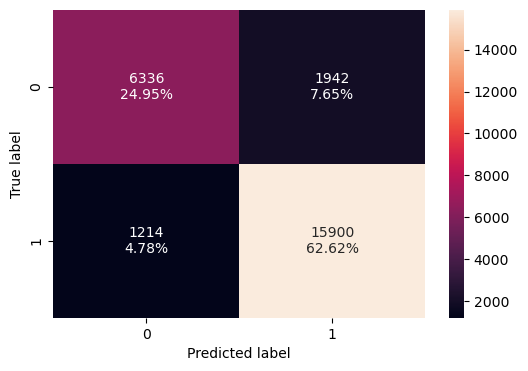

In [612]:
plot_confusion_matrix(dt_model_tuned,X_train,y_train)  ## create confusion matrix for training data

### Checking tuned Decision Tree Classifier performance on test set

In [614]:
decision_tree_tuned_perf_test = model_performance_classification(dt_model_tuned,X_test,y_test)  ## get model performance on test data
decision_tree_tuned_perf_test

,Accuracy,Recall,Precision,F1
0,0.87384,0.93073,0.88627,0.90796


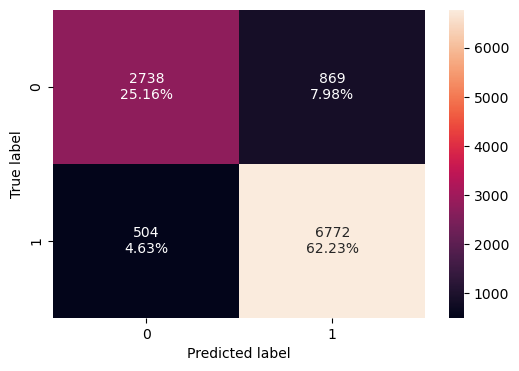

In [616]:
plot_confusion_matrix(dt_model_tuned,X_test,y_test)  ## create confusion matrix for test data

### Visualizing the Decision Tree

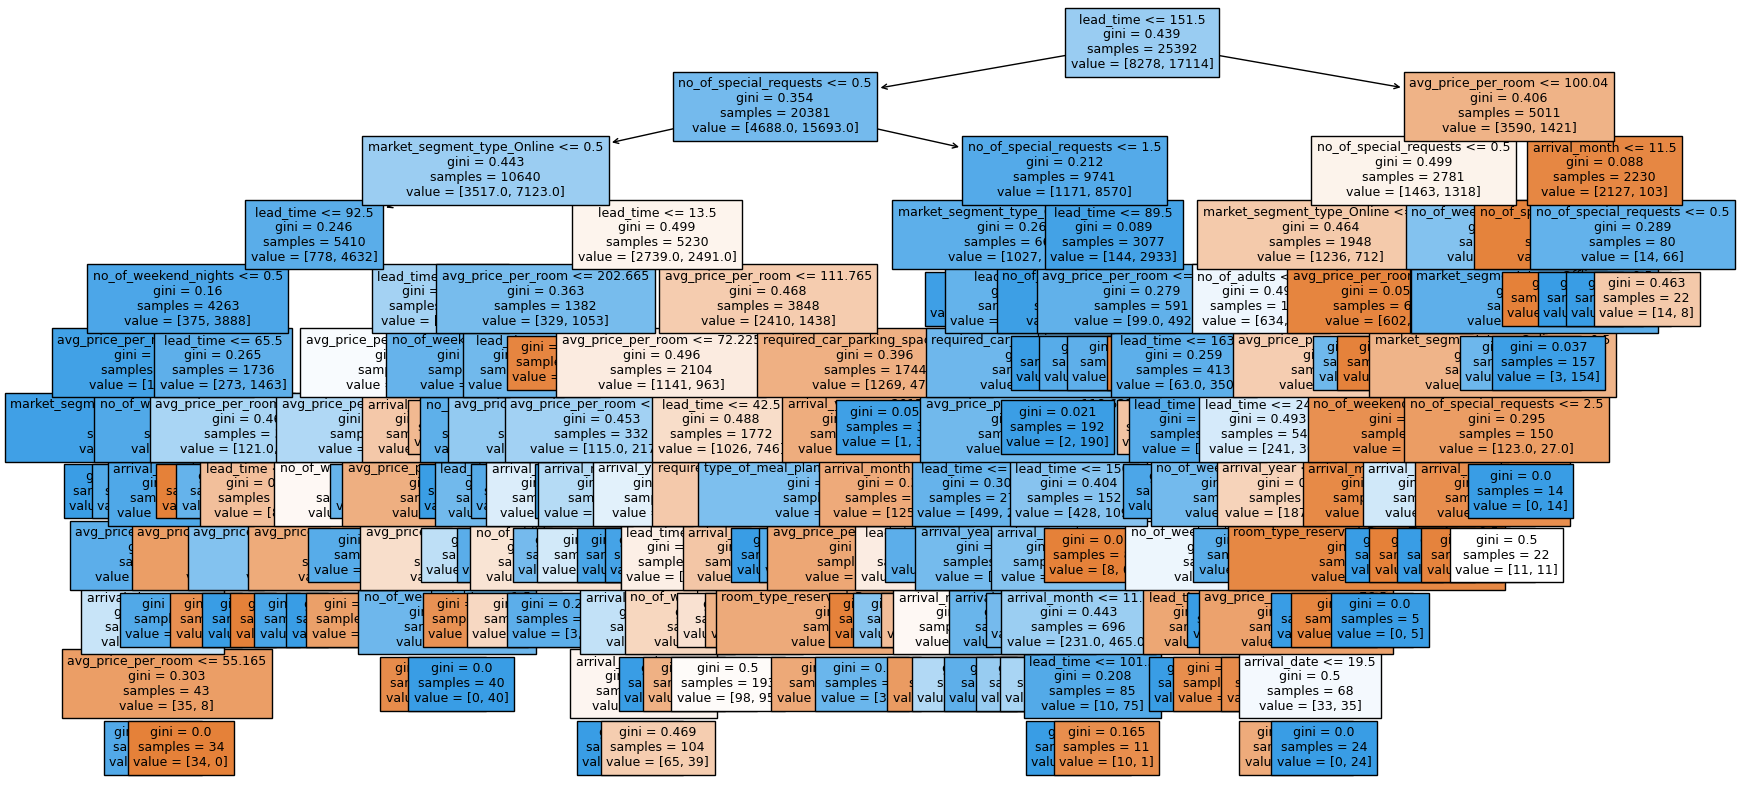

In [618]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    dt_model_tuned,
    feature_names=X_train.columns.tolist(),
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [619]:
print(tree.export_text(dt_model_tuned,feature_names=X_train.columns.tolist(), show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 92.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 201.50
|   |   |   |   |   |   |--- market_segment_type_Corporate <= 0.50
|   |   |   |   |   |   |   |--- weights: [6.00, 1814.00] class: 1
|   |   |   |   |   |   |--- market_segment_type_Corporate >  0.50
|   |   |   |   |   |   |   |--- weights: [78.00, 610.00] class: 1
|   |   |   |   |   |--- avg_price_per_room >  201.50
|   |   |   |   |   |   |--- weights: [18.00, 1.00] class: 0
|   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |--- lead_time <= 65.50
|   |   |   |   |   |   |--- no_of_weekend_nights <= 4.50
|   |   |   |   |   |   |   |--- arrival_month <= 9.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 62.40
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 27.50
|   |   |   |   |   |   |   |

### Analyzing Feature Importance for tuned Decision Tree Classifier

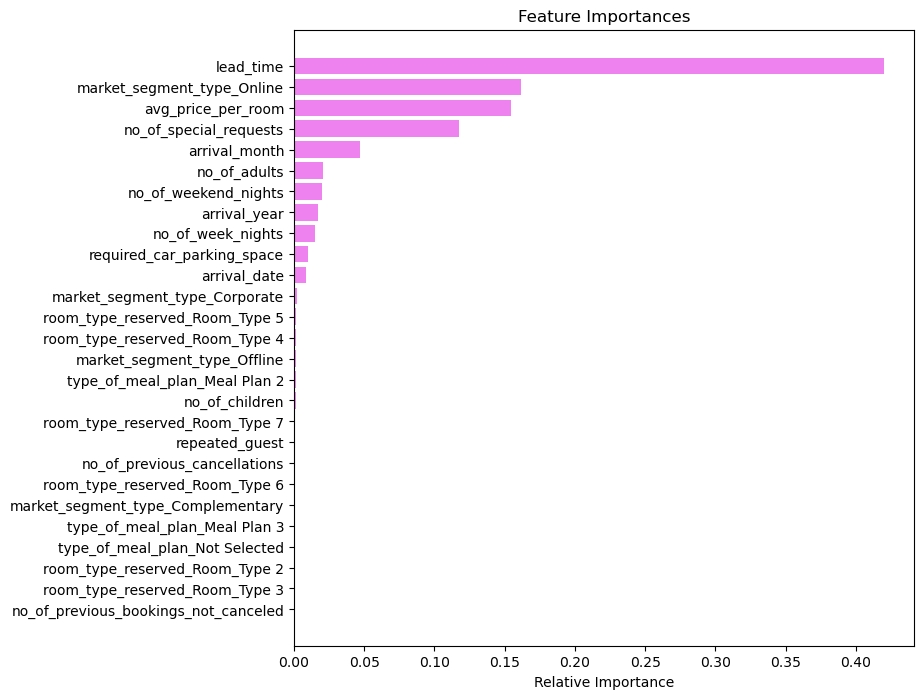

In [620]:
# # importance of features in the tree building

feature_names = X_train.columns.tolist()
importances = dt_model_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Cost Complexity Pruning (Post-pruning)

In [630]:
clf = DecisionTreeClassifier(random_state=42, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00000,0.00855
1,-0.00000,0.00855
2,0.00000,0.00855
3,0.00000,0.00855
4,0.00000,0.00855
...,...,...
1575,0.00904,0.32867
1576,0.01017,0.33884
1577,0.01199,0.35084
1578,0.03448,0.41979


In [634]:
clfs = []
i_clf = 1
for ccp_alpha in ccp_alphas:
    if ccp_alpha > 0:
        clf = DecisionTreeClassifier(random_state=42, class_weight="balanced", ccp_alpha=ccp_alpha)
        clf.fit(X_train, y_train)
        clfs.append(clf)
        print('Iteration ',i_clf,' - ccp_alpha: ',ccp_alpha)
    else:
        clf = DecisionTreeClassifier(random_state=42, class_weight="balanced", ccp_alpha=0)
        clf.fit(X_train, y_train)
        clfs.append(clf)
        print('Iteration ',i_clf,' - ccp_alpha: ','0')
    i_clf = i_clf + 1
print("\nNumber of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))

Iteration  1  - ccp_alpha:  0
Iteration  2  - ccp_alpha:  0
Iteration  3  - ccp_alpha:  2.9192495096496245e-20
Iteration  4  - ccp_alpha:  2.9192495096496245e-20
Iteration  5  - ccp_alpha:  2.9192495096496245e-20
Iteration  6  - ccp_alpha:  2.9192495096496245e-20
Iteration  7  - ccp_alpha:  2.9192495096496245e-20
Iteration  8  - ccp_alpha:  2.9192495096496245e-20
Iteration  9  - ccp_alpha:  3.243610566277361e-20
Iteration  10  - ccp_alpha:  3.243610566277361e-20
Iteration  11  - ccp_alpha:  5.1897769060437775e-20
Iteration  12  - ccp_alpha:  5.1897769060437775e-20
Iteration  13  - ccp_alpha:  5.1897769060437775e-20
Iteration  14  - ccp_alpha:  5.1897769060437775e-20
Iteration  15  - ccp_alpha:  5.1897769060437775e-20
Iteration  16  - ccp_alpha:  5.1897769060437775e-20
Iteration  17  - ccp_alpha:  5.1897769060437775e-20
Iteration  18  - ccp_alpha:  5.1897769060437775e-20
Iteration  19  - ccp_alpha:  5.1897769060437775e-20
Iteration  20  - ccp_alpha:  5.1897769060437775e-20
Iteration  21

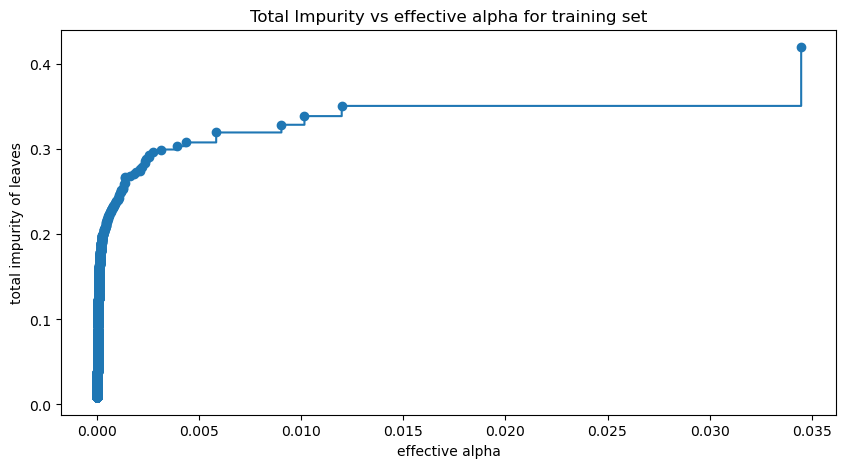

In [636]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

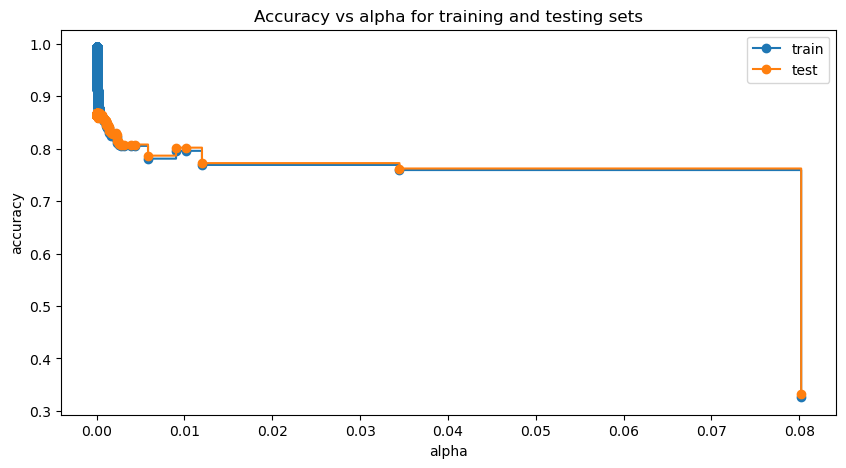

In [638]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [639]:
index_best_model = np.argmax(test_scores)
best_model = clfs[index_best_model]
print(best_model)
print('Training accuracy of best model: ',best_model.score(X_train, y_train))
print('Test accuracy of best model: ',best_model.score(X_test, y_test))

DecisionTreeClassifier(ccp_alpha=6.509884801418121e-05, class_weight='balanced',
                       random_state=42)
Training accuracy of best model:  0.9462035286704474
Test accuracy of best model:  0.8675916567123035


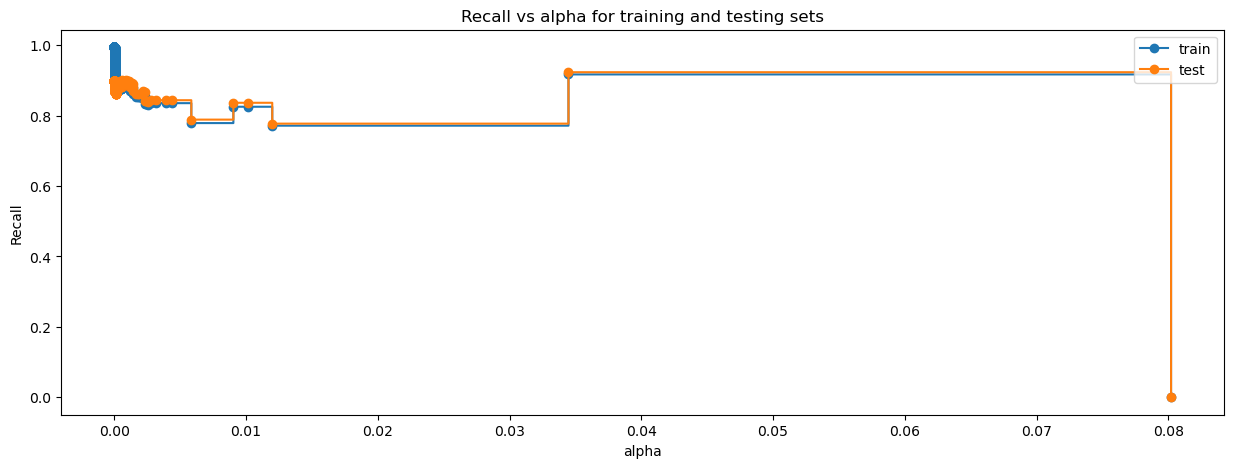

In [640]:
recall_train=[]
for clf in clfs:
    pred_train=clf.predict(X_train)
    values_train=metrics.recall_score(y_train,pred_train)
    recall_train.append(values_train)

recall_test=[]
for clf in clfs:
    pred_test=clf.predict(X_test)
    values_test=metrics.recall_score(y_test,pred_test)
    recall_test.append(values_test)

fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [644]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.034476349678657564, class_weight='balanced',
                       random_state=42)


,Accuracy,Recall,Precision,F1
0,0.75941,0.91697,0.76998,0.83707


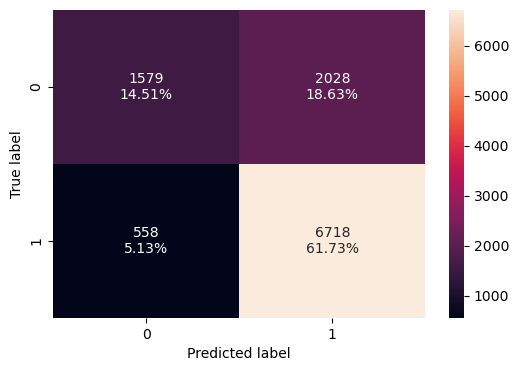

In [646]:
# Plot Confusion Matrix - Train
plot_confusion_matrix(best_model,X_test,y_test)

decision_tree_tuned_perf_train_ccp = model_performance_classification(best_model,X_train,y_train)  ## get model performance on training data
decision_tree_tuned_perf_train_ccp

,Accuracy,Recall,Precision,F1
0,0.76238,0.92331,0.76812,0.83860


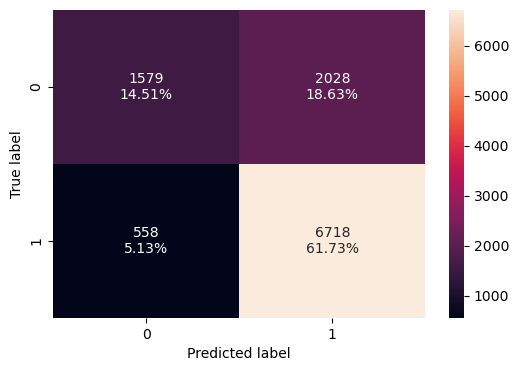

In [648]:
# Plot Confusion Matrix - Test
plot_confusion_matrix(best_model,X_test,y_test)

decision_tree_tuned_perf_test_ccp = model_performance_classification(best_model,X_test,y_test)  ## get model performance on training data
decision_tree_tuned_perf_test_ccp

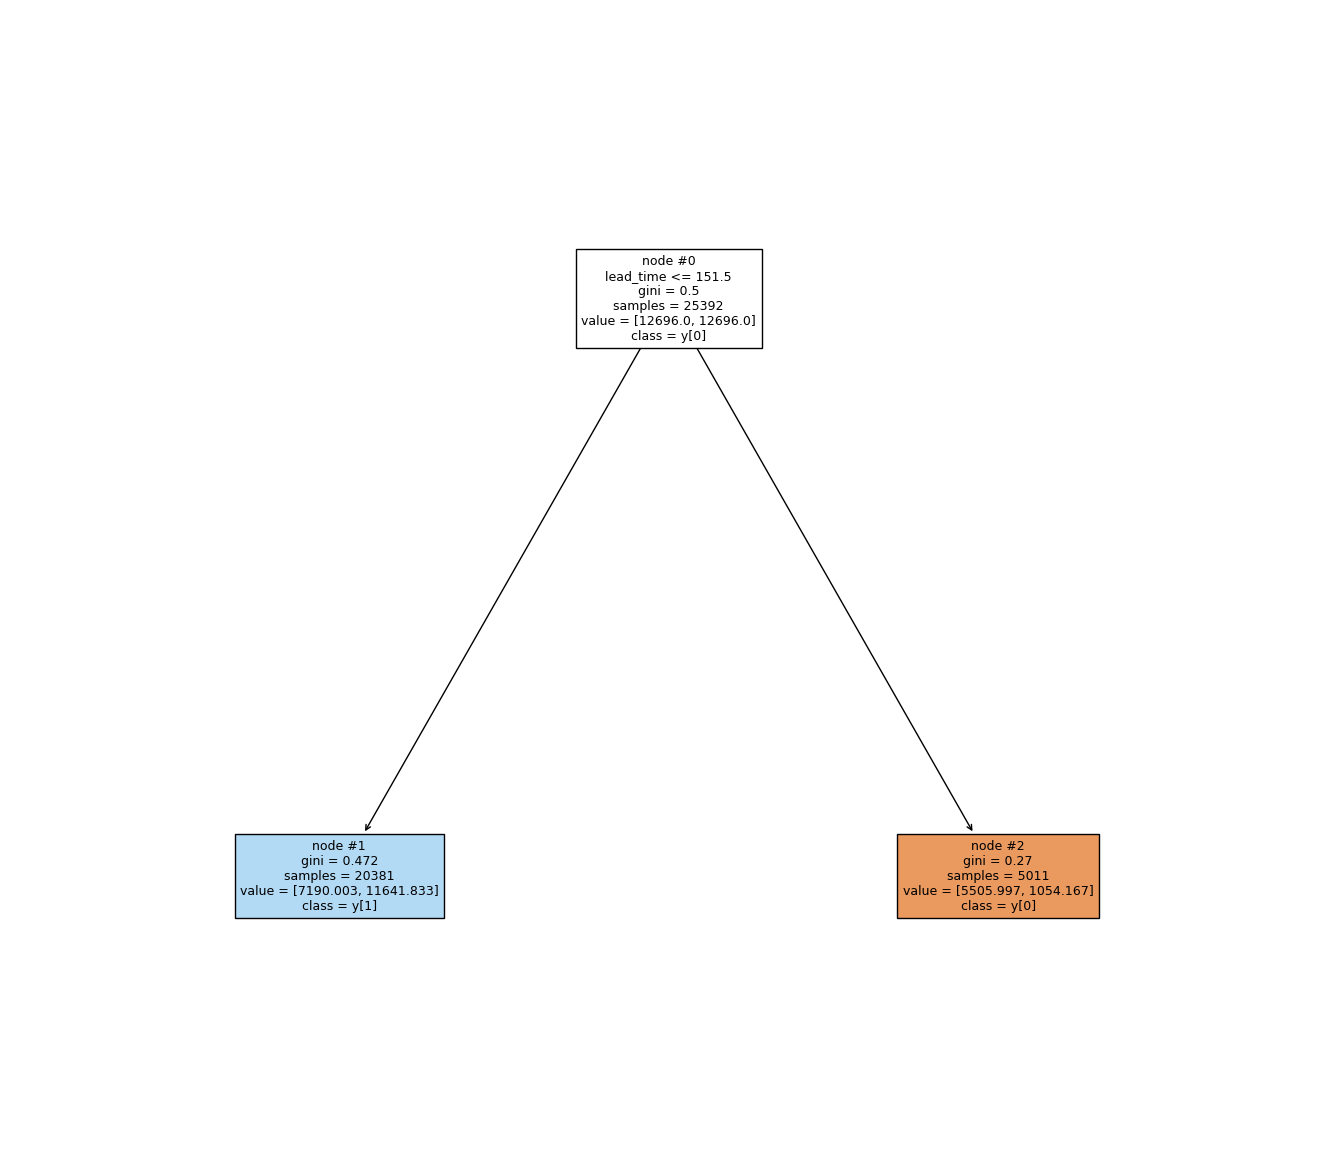

|--- lead_time <= 151.50
|   |--- weights: [7190.00, 11641.83] class: 1
|--- lead_time >  151.50
|   |--- weights: [5506.00, 1054.17] class: 0



In [650]:
#visualizing Decision Tree
plt.figure(figsize=(17,15))

tree.plot_tree(best_model,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

print(tree.export_text(best_model,feature_names=feature_names,show_weights=True))

                                         Imp
lead_time                            1.00000
no_of_adults                         0.00000
type_of_meal_plan_Meal Plan 2        0.00000
market_segment_type_Offline          0.00000
market_segment_type_Corporate        0.00000
market_segment_type_Complementary    0.00000
room_type_reserved_Room_Type 7       0.00000
room_type_reserved_Room_Type 6       0.00000
room_type_reserved_Room_Type 5       0.00000
room_type_reserved_Room_Type 4       0.00000
room_type_reserved_Room_Type 3       0.00000
room_type_reserved_Room_Type 2       0.00000
type_of_meal_plan_Not Selected       0.00000
type_of_meal_plan_Meal Plan 3        0.00000
no_of_special_requests               0.00000
no_of_children                       0.00000
avg_price_per_room                   0.00000
no_of_previous_bookings_not_canceled 0.00000
no_of_previous_cancellations         0.00000
repeated_guest                       0.00000
arrival_date                         0.00000
arrival_mo

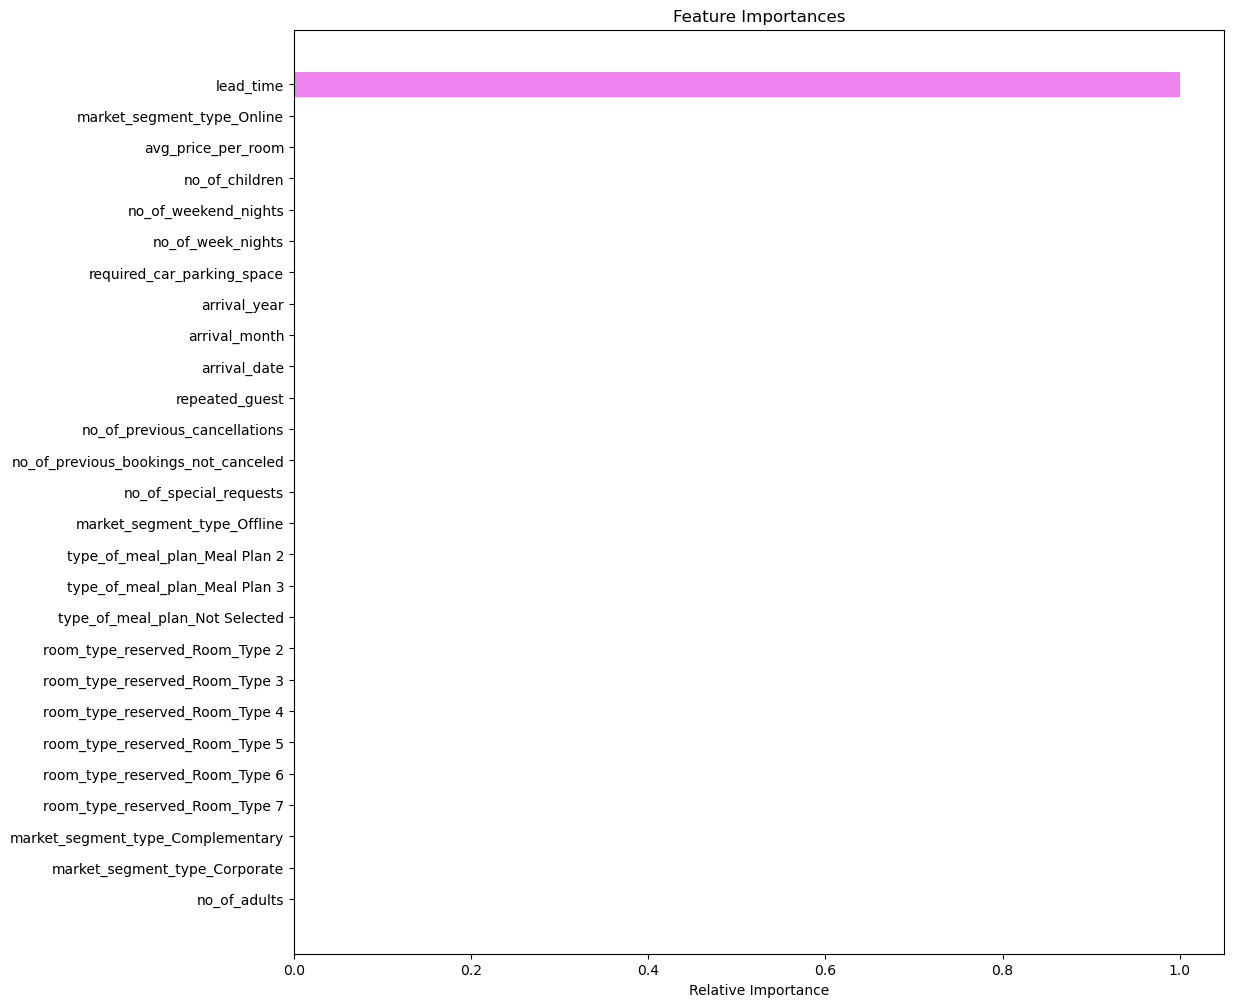

In [652]:
print (pd.DataFrame(best_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# **Model Performance Comparison and Final Model Selection**

In [654]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        logistic_reg_perf_train.T,
        logistic_reg_tune_perf_train.T,
        nb_perf_train.T,
        knn_perf_train.T,
        knn_tuned_perf_train.T,
        decision_tree_perf_train.T,
        decision_tree_tuned_perf_train.T,
        decision_tree_tuned_perf_train_ccp.T
            ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression Base",
    "Logistic Regression Tuned",
    "Naive Bayes Base",
    "KNN Base",
    "KNN Tuned",
    "Decision Tree Base",
    "Decision Tree Tuned - Pre pruning",
    "Decision Tree Tuned - Post pruning"
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression Base,Logistic Regression Tuned,Naive Bayes Base,KNN Base,KNN Tuned,Decision Tree Base,Decision Tree Tuned - Pre pruning,Decision Tree Tuned - Post pruning
Accuracy,0.80498,0.79214,0.41080,0.89178,0.91167,0.99366,0.87571,0.75941
Recall,0.89085,0.81647,0.14357,0.93391,0.94548,0.99369,0.92906,0.91697
Precision,0.83175,0.86735,0.88989,0.90812,0.92510,0.99689,0.89116,0.76998
F1,0.86029,0.84114,0.24725,0.92084,0.93518,0.99529,0.90972,0.83707


In [656]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        logistic_reg_perf_train.T,
        logistic_reg_tune_perf_train.T,
        nb_perf_test.T,
        knn_perf_test.T,
        knn_tuned_perf_test.T,
        decision_tree_perf_test.T,
        decision_tree_tuned_perf_test.T,
        decision_tree_tuned_perf_test_ccp.T
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression Base",
    "Logistic Regression Tuned",
    "Naive Bayes Base",
    "KNN Base",
    "KNN Tuned",
    "Decision Tree Base",
    "Decision Tree Tuned - Pre pruning",
    "Decision Tree Tuned - Post pruning"
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression Base,Logistic Regression Tuned,Naive Bayes Base,KNN Base,KNN Tuned,Decision Tree Base,Decision Tree Tuned - Pre pruning,Decision Tree Tuned - Post pruning
Accuracy,0.80498,0.79214,0.41726,0.69200,0.84820,0.86566,0.87384,0.76238
Recall,0.89085,0.81647,0.14596,0.72347,0.90077,0.89775,0.93073,0.92331
Precision,0.83175,0.86735,0.89244,0.79709,0.87573,0.90097,0.88627,0.76812
F1,0.86029,0.84114,0.25089,0.75850,0.88808,0.89935,0.90796,0.83860


# **Actionable Insights and Recommendations**

In [ ]:
# Please refer Business Report